### Task : House Price Prediction

##### Machine Learning model to predict house price using linear regression.


### _Type of Regression_ : Linear Regression

#### _Input_ : AREA, INT_SQFT, N_BEDROOM, N_BATHROOM, N_ROOM, SALE_COND, PARK_FACIL,

#### BUILDTYPE, UTILITY_AVAIL, STREET, MZZONE, REG_FEE, COMMIS

#### _Output_ : SALES_PRICE


### Importing necessary modules


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, model_selection, preprocessing, base, metrics, pipeline

### Collecting and Analyzing the Data


In [2]:
# Loading the dataset into a data frame

path = os.path.join("Datasets", "housing_price.csv")

df = pd.read_csv(path)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [4]:
def desc_df(df):
    target = df.columns[-1]
    print("Target Variable :", target)
    print(f"Number of Samples : {df.shape[0]}\nNumber of Features : {df.shape[1]}")
    print("Number of Independent Variable(s) :", df.shape[1] - 1)
    print("Number of Dependent Variable(s) :", 1)
    
desc_df(df)

Target Variable : SALES_PRICE
Number of Samples : 7109
Number of Features : 22
Number of Independent Variable(s) : 21
Number of Dependent Variable(s) : 1


In [5]:
# Checking for null values in each column

print(np.sum(df.isna()))

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64


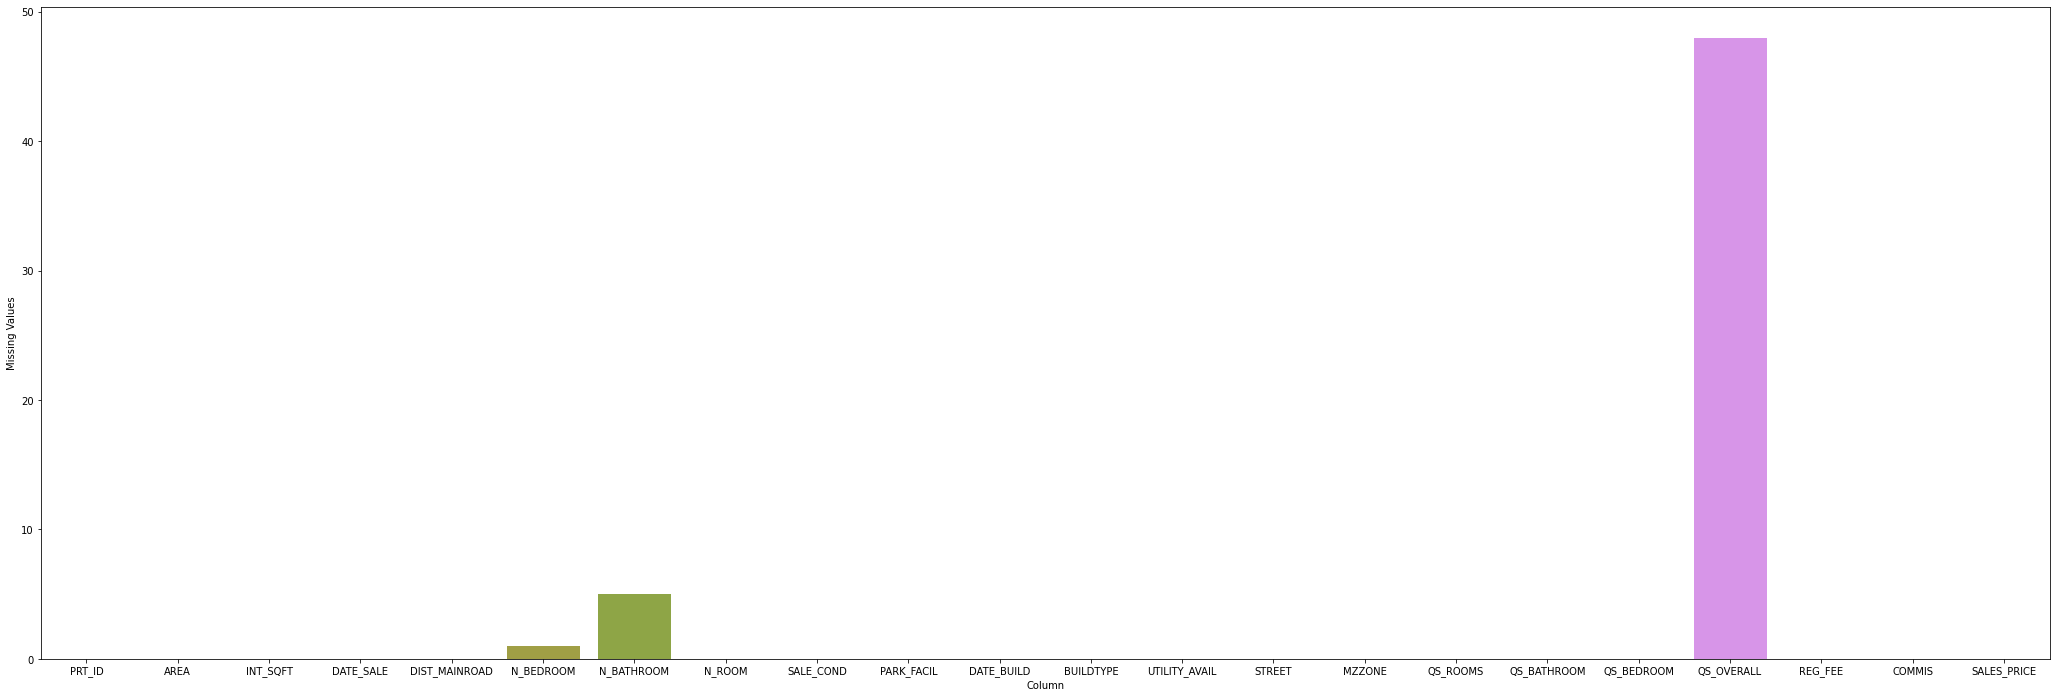

In [6]:
# Visualizing missing data in each column

plt.figure(figsize = (36, 12))
plt.xlabel("Column")
plt.ylabel("Missing Values")
sns.barplot(x = df.columns, y = np.sum(df.isna()).values)
plt.show()

#### Data Cleaning


In [7]:
# Dropping rows with null values

df.dropna(inplace = True)

In [8]:
print("Is there any null value :", any(np.sum(df.isna())))

Is there any null value : False


In [9]:
target = df.columns[-1]

def desc_df(df):
    target = df.columns[-1]
    print("Target Variable :", target)
    print(f"Number of Samples : {df.shape[0]}\nNumber of Features : {df.shape[1]}")
    print("Number of Independent Variable(s) :", df.shape[1] - 1)
    print("Number of Dependent Variable(s) :", 1)
    
desc_df(df)

Target Variable : SALES_PRICE
Number of Samples : 7056
Number of Features : 22
Number of Independent Variable(s) : 21
Number of Dependent Variable(s) : 1


In [10]:
# Checking for duplicated data (if any)

print("Is there any duplicated data : ", any(df.duplicated()))

Is there any duplicated data :  False


In [11]:
# Getting unique number of values in each column

print(df.nunique())

PRT_ID           7056
AREA               17
INT_SQFT         1698
DATE_SALE        2794
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5773
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          6986
COMMIS           6960
SALES_PRICE      7005
dtype: int64


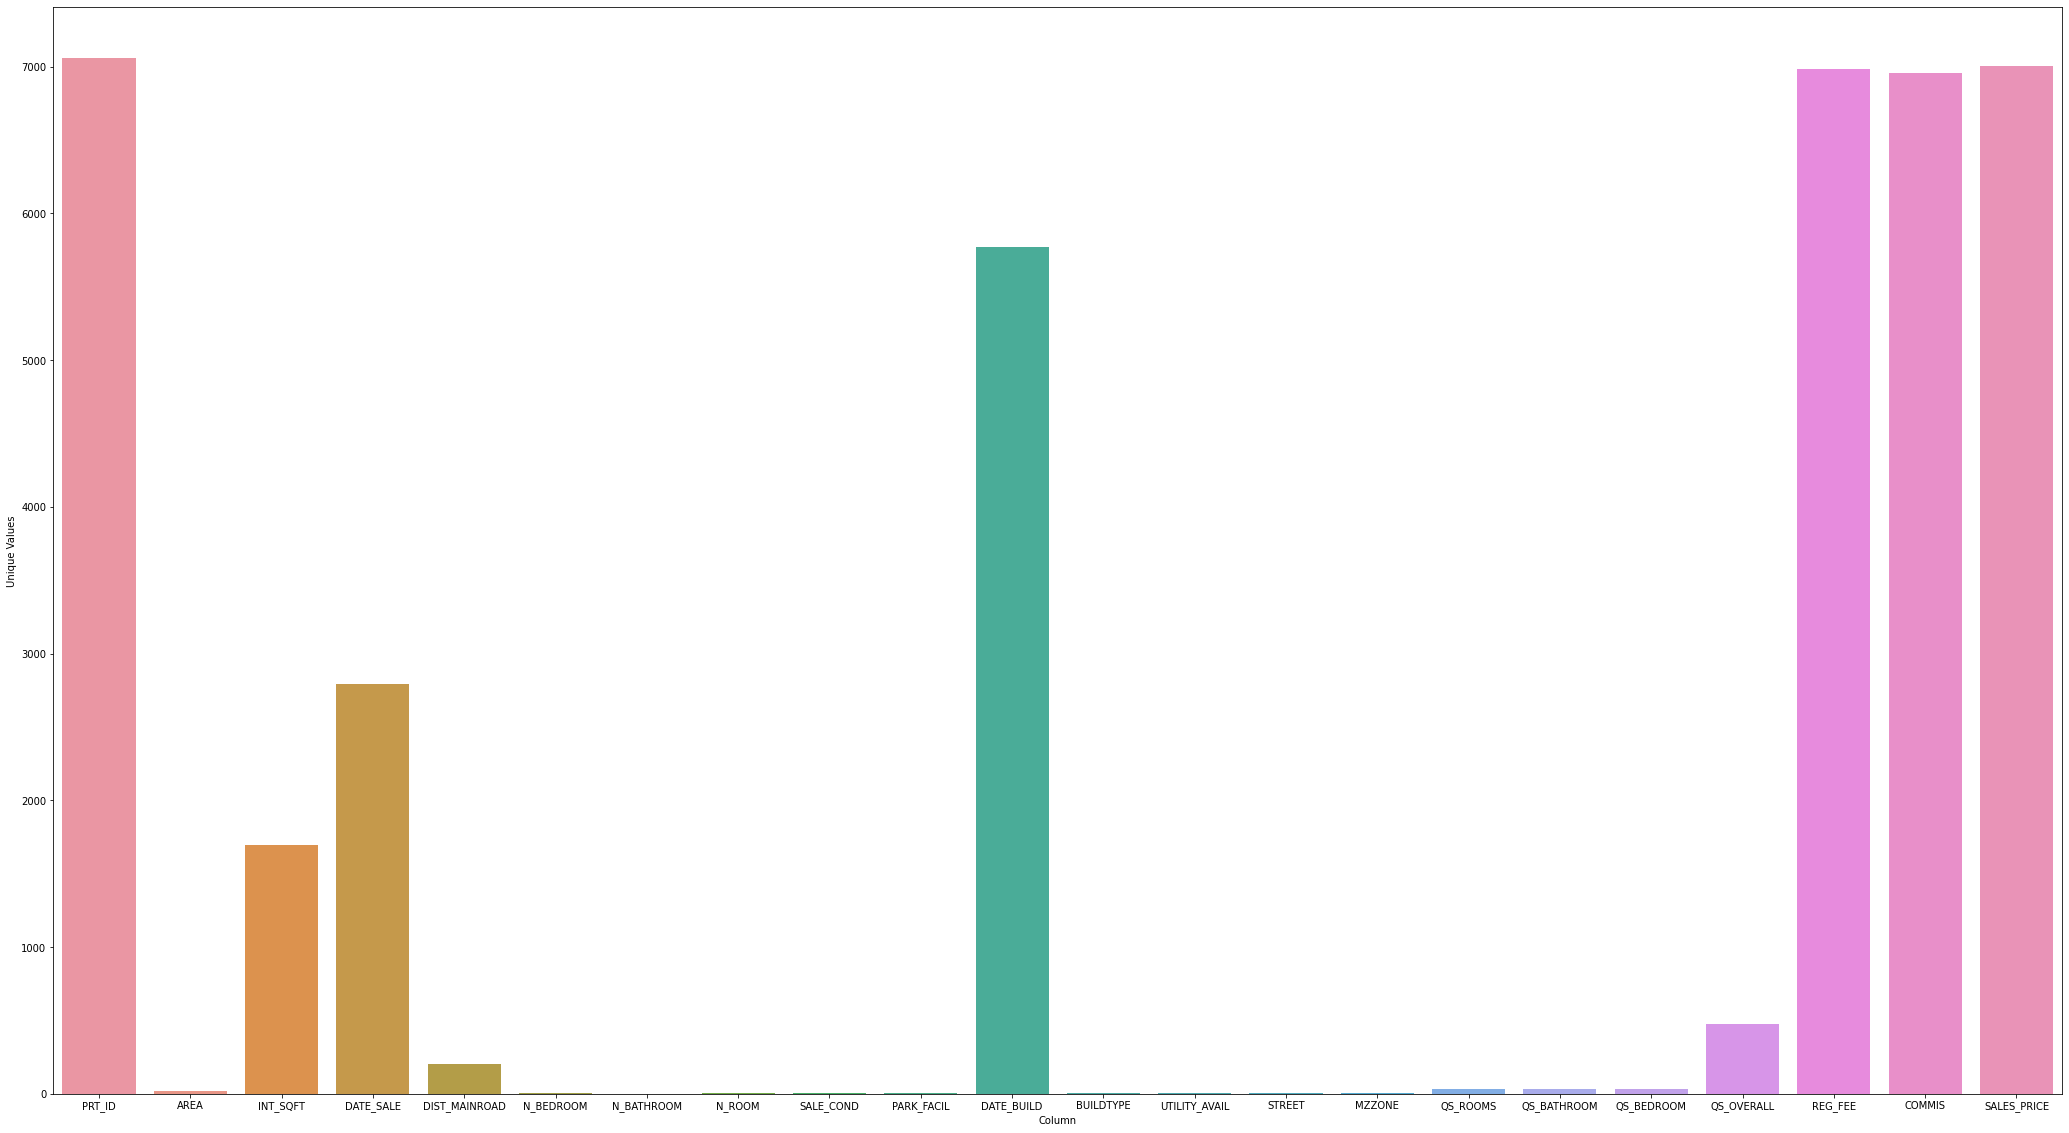

In [12]:
# Visualizing unique values in each column

plt.figure(figsize = (36, 20))
plt.xlabel("Column")
plt.ylabel("Unique Values")
sns.barplot(x = df.nunique().keys(), y = df.nunique().values)
plt.show()

In [13]:
# Converting 'DATE_SALE' and 'DATE_BUILD' columns to 'datetime' (Incorrect Data Format)

df['DATE_SALE'] = pd.to_datetime(df['DATE_SALE'], format = r"%d-%m-%Y")
df['DATE_BUILD'] = pd.to_datetime(df['DATE_BUILD'], format = r"%d-%m-%Y")

In [14]:
# Converting 'N_BEDROOM' and 'N_BATHROOM' columns to 'int64' (Incorrect Data Format)

df['N_BEDROOM'] = df['N_BEDROOM'].values.astype(np.int64)
df['N_BATHROOM'] = df['N_BATHROOM'].values.astype(np.int64)

In [15]:
print(df.dtypes)

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object


In [16]:
# Summary of the data frame

df.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.505896,3.485332,3.503389,376791.852608,140994.273384,1.088801e+07
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.897644,0.886814,0.527313,143109.581793,78774.465963,3.769081e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272117.500000,84212.750000,8.266790e+06
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349444.500000,127640.500000,1.031922e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451030.500000,184449.000000,1.298148e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [17]:
# Correlation Matrix (Pearson Correlation Co-efficient)

corr_matrix = df.corr()
corr_matrix

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
INT_SQFT,1.000000,0.002267,0.786721,0.517103,0.951305,0.020495,-0.007249,0.009643,0.013830,0.658005,0.571667,0.612668
DIST_MAINROAD,0.002267,1.000000,-0.001938,0.002496,0.002313,0.002739,-0.030999,0.001141,-0.017482,0.011144,0.010203,0.018062
N_BEDROOM,0.786721,-0.001938,1.000000,0.756016,0.840654,0.015508,-0.006461,0.015810,0.013932,0.456759,0.431035,0.332595
N_BATHROOM,0.517103,0.002496,0.756016,1.000000,0.570110,0.013487,-0.011091,0.012278,0.007858,0.262570,0.258199,0.110984
N_ROOM,0.951305,0.002313,0.840654,0.570110,1.000000,0.016710,-0.006636,0.015618,0.015234,0.631578,0.534058,0.603417
QS_ROOMS,0.020495,0.002739,0.015508,0.013487,0.016710,1.000000,0.009111,0.009570,0.517906,0.020699,0.009068,0.022278
QS_BATHROOM,-0.007249,-0.030999,-0.006461,-0.011091,-0.006636,0.009111,1.000000,-0.012320,0.551172,-0.007145,-0.001381,-0.012346
QS_BEDROOM,0.009643,0.001141,0.015810,0.012278,0.015618,0.009570,-0.012320,1.000000,0.630583,0.022313,0.020660,0.020079
QS_OVERALL,0.013830,-0.017482,0.013932,0.007858,0.015234,0.517906,0.551172,0.630583,1.000000,0.022175,0.016722,0.020352
REG_FEE,0.658005,0.011144,0.456759,0.262570,0.631578,0.020699,-0.007145,0.022313,0.022175,1.000000,0.660394,0.878274


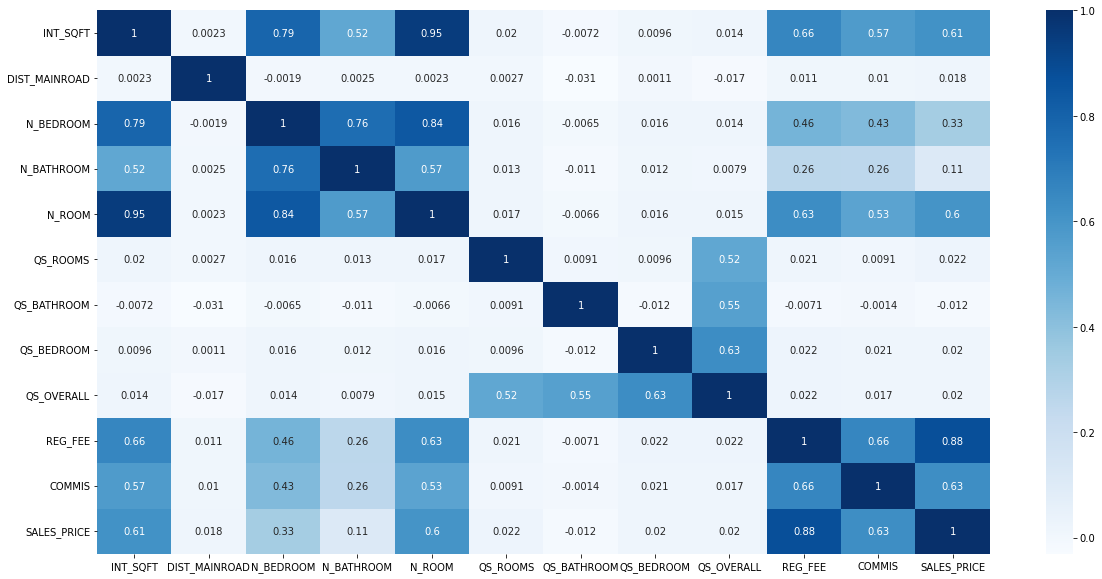

In [18]:
# Visualizing the correlation matrix with a heatmap

plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True, cmap = plt.get_cmap('Blues'))
plt.show()

In [19]:
# Correlation of each attribute with target attribute (in decreasing order)

corr_with_target = corr_matrix[target].sort_values(ascending = False)
print(corr_with_target)

SALES_PRICE      1.000000
REG_FEE          0.878274
COMMIS           0.627277
INT_SQFT         0.612668
N_ROOM           0.603417
N_BEDROOM        0.332595
N_BATHROOM       0.110984
QS_ROOMS         0.022278
QS_OVERALL       0.020352
QS_BEDROOM       0.020079
DIST_MAINROAD    0.018062
QS_BATHROOM     -0.012346
Name: SALES_PRICE, dtype: float64


In [20]:
# Seperating Numerical and Categorical Attributes

cat_only_attr = []  ## Categorical but not Numerical
cat_num_attr = []  ## Categorical but Numerical
num_attr = []  ## Numerical but not Categorical

for attr in df.columns:
    if df[attr].dtype == object:
        cat_only_attr.append(attr)
    elif df[attr].dtype == np.int64 and len(np.unique(df[attr])) < min(10, df.shape[0]):
        cat_num_attr.append(attr)
    elif df[attr].dtype == np.int64 or df[attr].dtype == np.float64:
        num_attr.append(attr)
    
print("Categorical :", cat_only_attr)
print("Categorical but Numerical :", cat_num_attr)
print("Numerical Attributes :", num_attr)

Categorical : ['PRT_ID', 'AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']
Categorical but Numerical : ['N_BEDROOM', 'N_BATHROOM', 'N_ROOM']
Numerical Attributes : ['INT_SQFT', 'DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE']


In [21]:
# Getting rid of unwanted columns

df.drop(num_attr[1:6], inplace = True, axis = 1)
df.drop(cat_only_attr[:1], inplace = True, axis = 1)

num_attr = num_attr[:1] + num_attr[6:]
cat_only_attr = cat_only_attr[1:]
cat_attr = cat_only_attr + cat_num_attr

In [22]:
original_df = df.copy()

print("Final Columns :", np.array(df.columns))

Final Columns : ['AREA' 'INT_SQFT' 'DATE_SALE' 'N_BEDROOM' 'N_BATHROOM' 'N_ROOM'
 'SALE_COND' 'PARK_FACIL' 'DATE_BUILD' 'BUILDTYPE' 'UTILITY_AVAIL'
 'STREET' 'MZZONE' 'REG_FEE' 'COMMIS' 'SALES_PRICE']


In [23]:
print("Numerical Attributes :", num_attr)
print("Categorical Attributes :", cat_attr)

Numerical Attributes : ['INT_SQFT', 'REG_FEE', 'COMMIS', 'SALES_PRICE']
Categorical Attributes : ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM']


In [24]:
# Count of Unique values in each category

for attr in cat_attr:
    print(attr + " : \n")
    print(df[attr].value_counts(), '\n\n')

AREA : 

Chrompet      1671
Karapakkam    1356
KK Nagar       989
Velachery      973
Anna Nagar     772
Adyar          768
T Nagar        490
Chrompt          9
Chrmpet          6
TNagar           5
Chormpet         5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64 


SALE_COND : 

AdjLand        1426
Normal Sale    1416
Partial        1414
AbNormal       1396
Family         1390
Adj Land          6
Ab Normal         5
Partiall          2
PartiaLl          1
Name: SALE_COND, dtype: int64 


PARK_FACIL : 

Yes    3557
No     3498
Noo       1
Name: PARK_FACIL, dtype: int64 


BUILDTYPE : 

House         2433
Commercial    2307
Others        2287
Other           25
Comercial        4
Name: BUILDTYPE, dtype: int64 


UTILITY_AVAIL : 

AllPub     1874
NoSeWa     1860
NoSewr     1812
ELO        1509
All Pub       1
Name: UTILITY_AVAIL, dtype: int64 


STREET : 

Paved        2542
Gravel       2502
No A

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7056 non-null   object        
 1   INT_SQFT       7056 non-null   int64         
 2   DATE_SALE      7056 non-null   datetime64[ns]
 3   N_BEDROOM      7056 non-null   int64         
 4   N_BATHROOM     7056 non-null   int64         
 5   N_ROOM         7056 non-null   int64         
 6   SALE_COND      7056 non-null   object        
 7   PARK_FACIL     7056 non-null   object        
 8   DATE_BUILD     7056 non-null   datetime64[ns]
 9   BUILDTYPE      7056 non-null   object        
 10  UTILITY_AVAIL  7056 non-null   object        
 11  STREET         7056 non-null   object        
 12  MZZONE         7056 non-null   object        
 13  REG_FEE        7056 non-null   int64         
 14  COMMIS         7056 non-null   int64         
 15  SALES_PRICE    7056 n

### Data Visualization


In [26]:
df = original_df.copy()

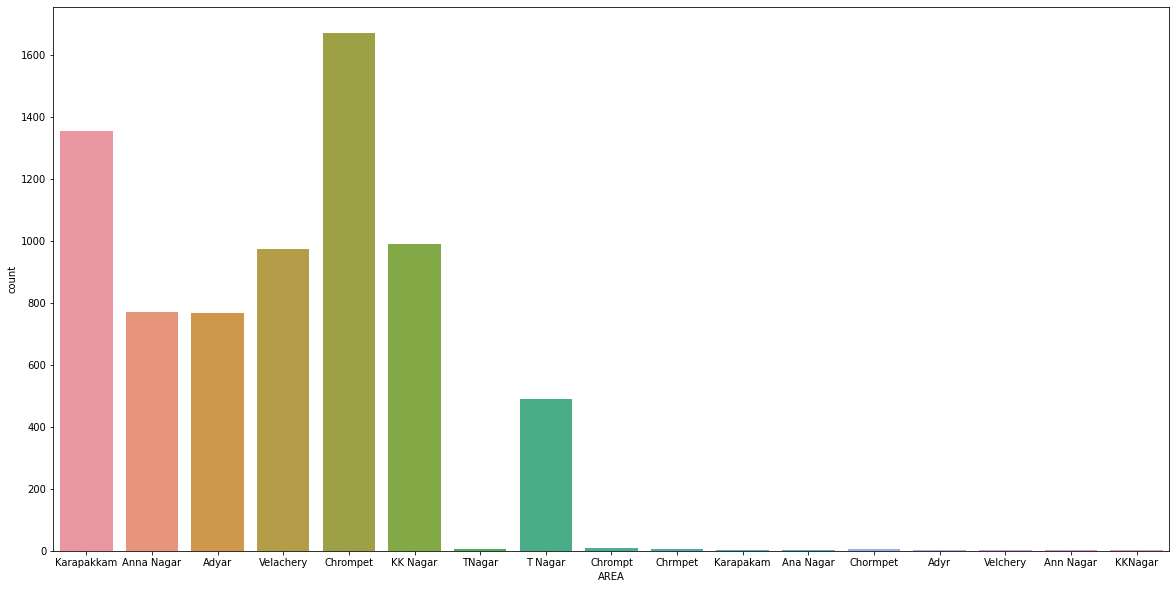

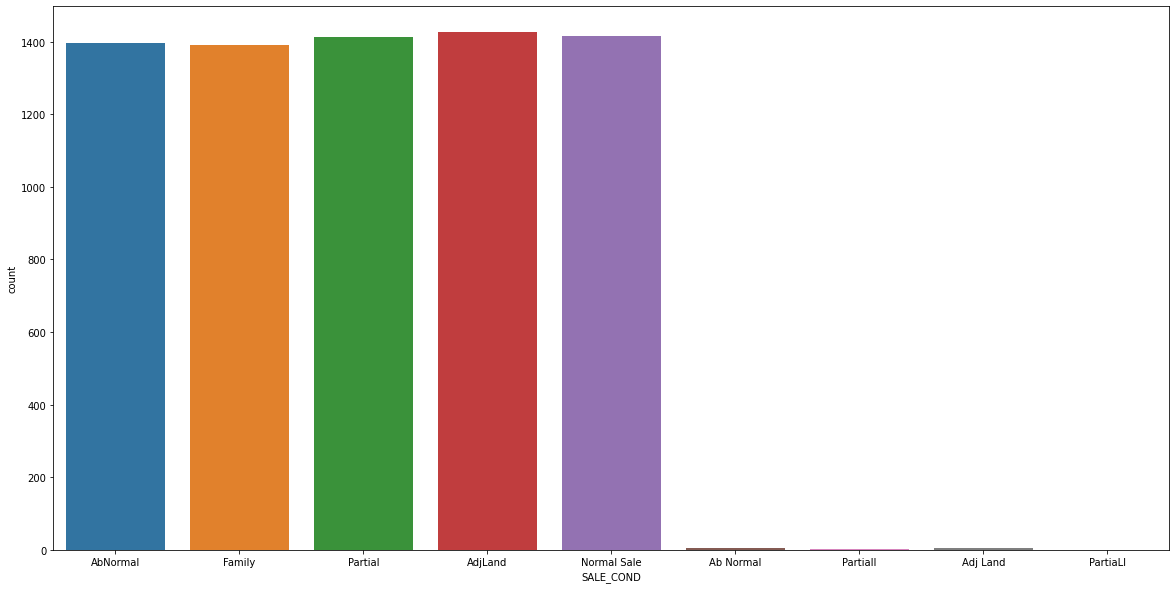

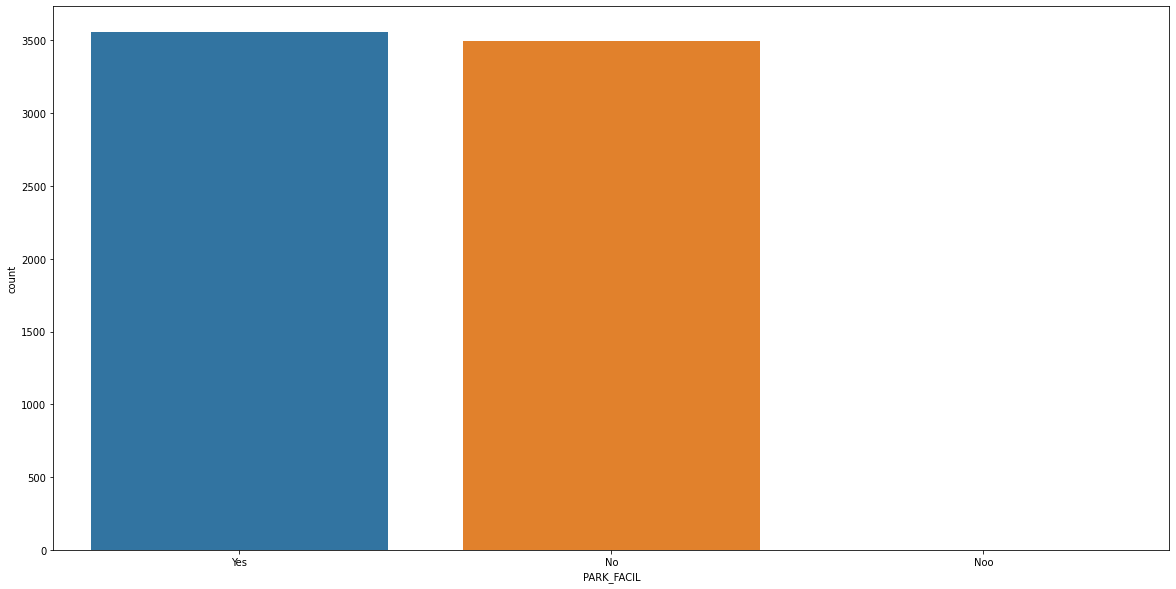

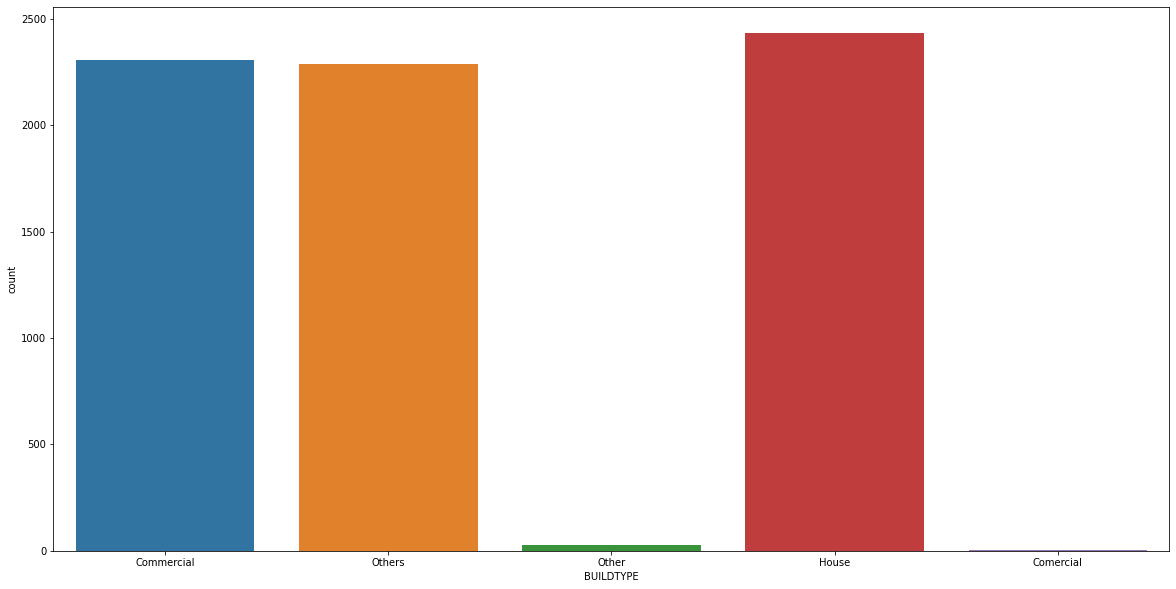

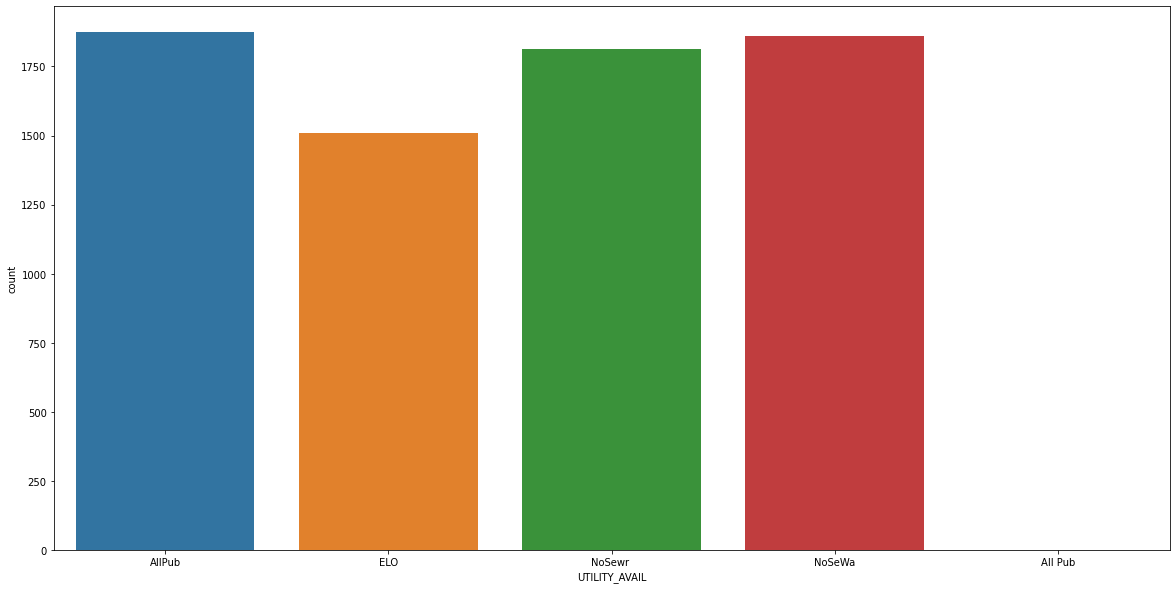

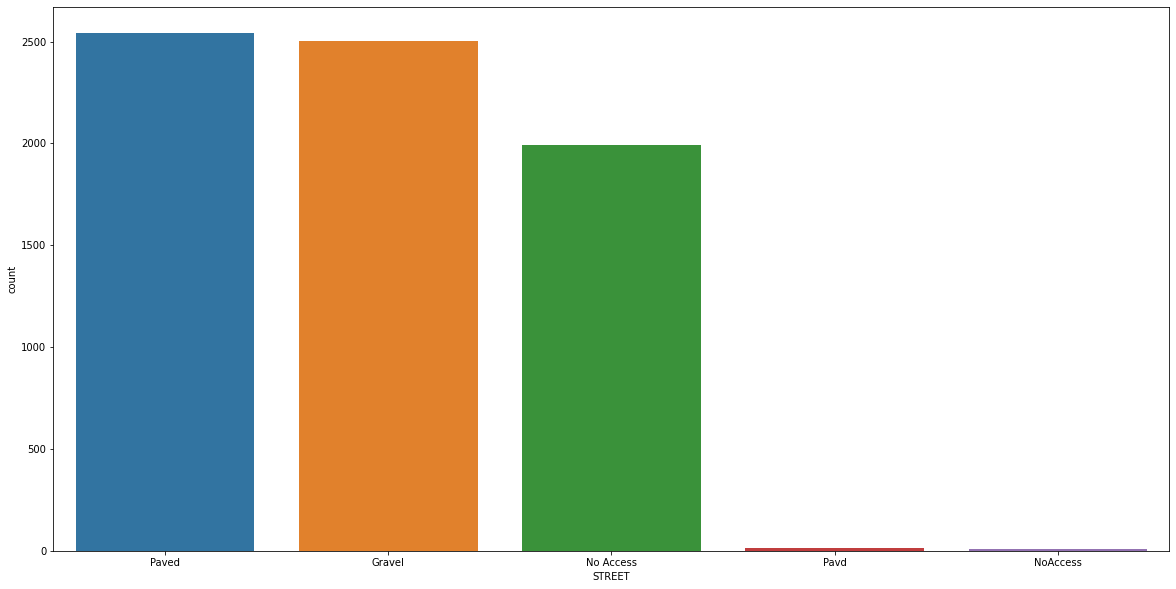

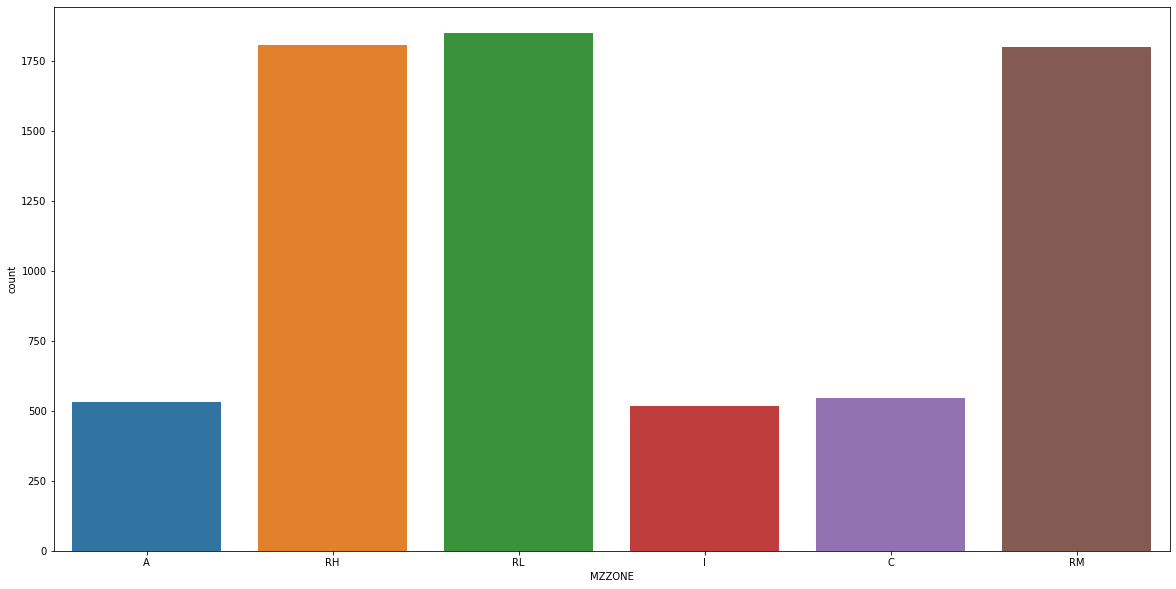

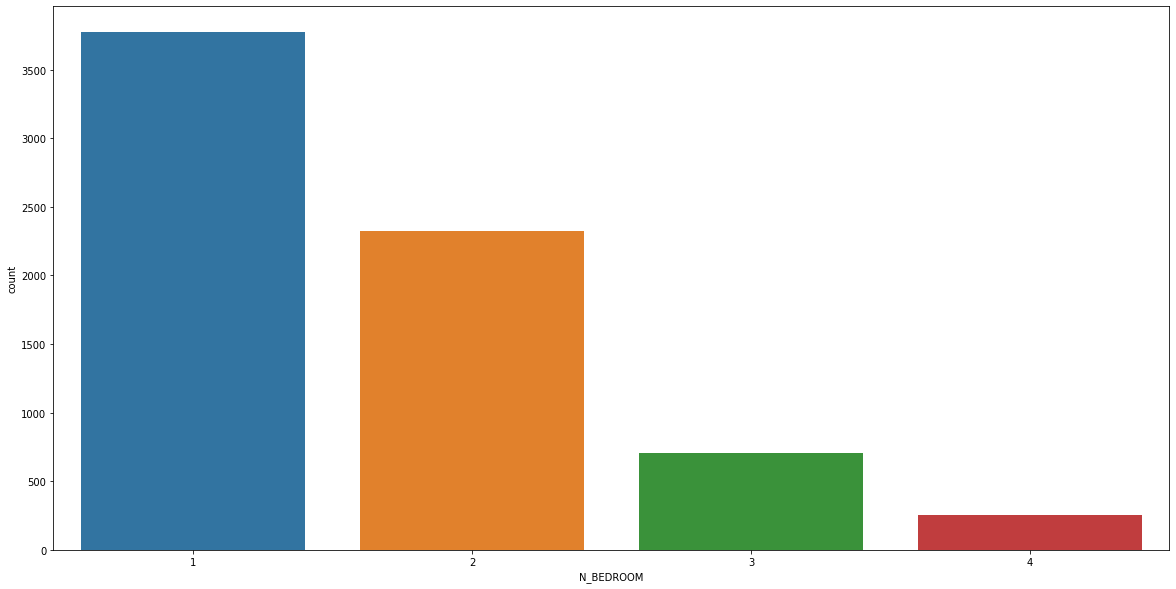

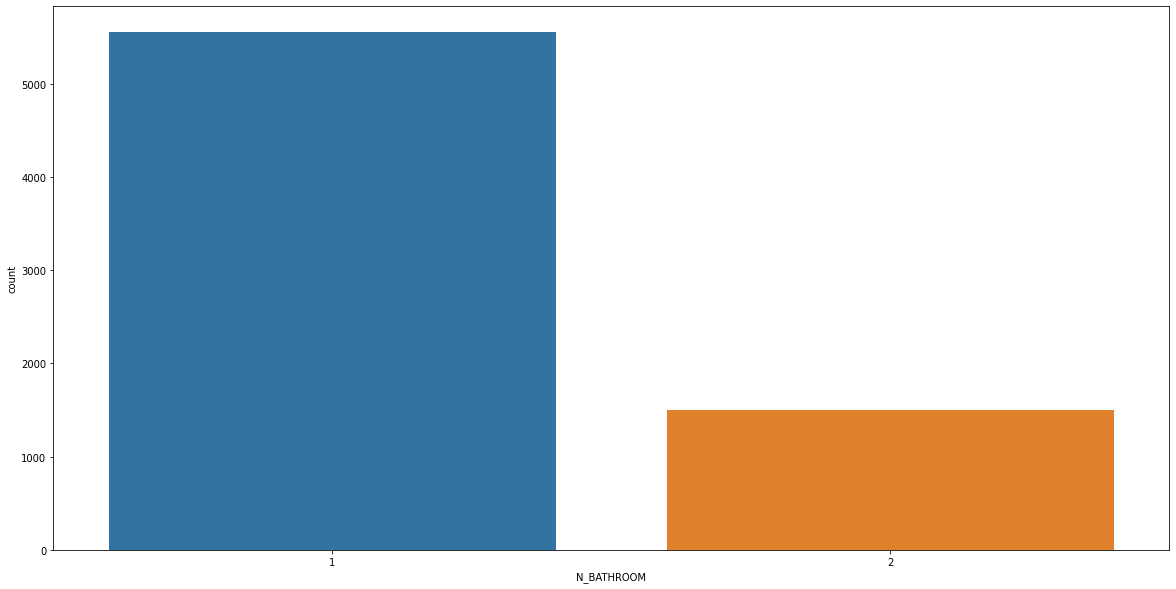

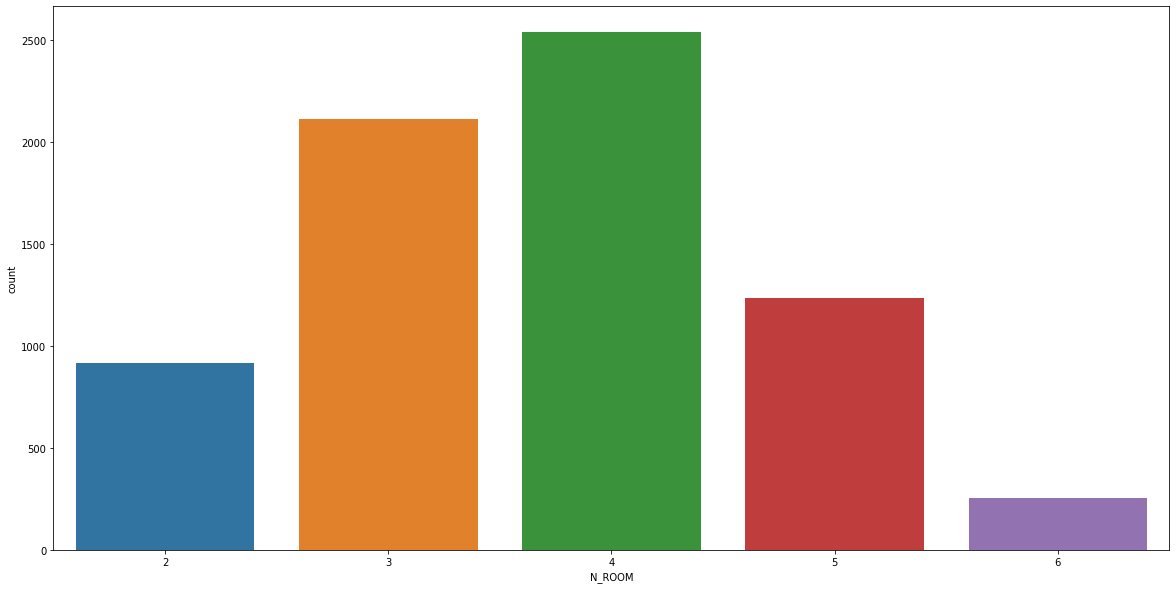

In [27]:
# Count Plot

for attr in cat_attr:
    plt.figure(figsize = (20, 10))
    sns.countplot(x = attr, data = df)
    plt.show()

Correlation Co-efficient - INT_SQFT vs REG_FEE : 0.6580049758690324


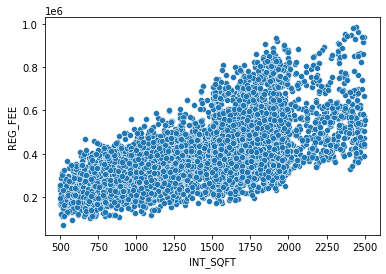

Correlation Co-efficient - INT_SQFT vs COMMIS : 0.5716666522185085


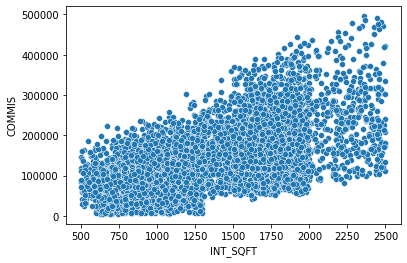

Correlation Co-efficient - INT_SQFT vs SALES_PRICE : 0.6126680474998588


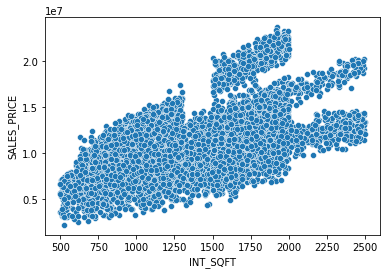

Correlation Co-efficient - REG_FEE vs COMMIS : 0.6603941219637816


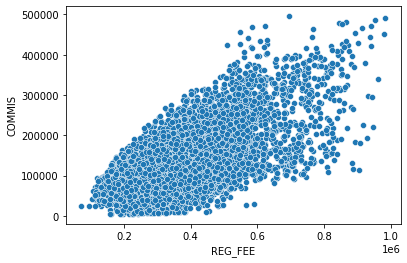

Correlation Co-efficient - REG_FEE vs SALES_PRICE : 0.8782740699162725


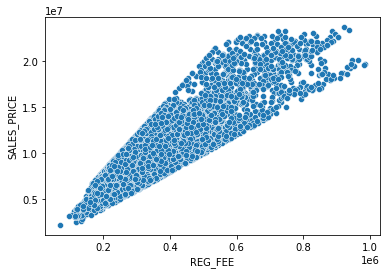

Correlation Co-efficient - COMMIS vs SALES_PRICE : 0.627276596368807


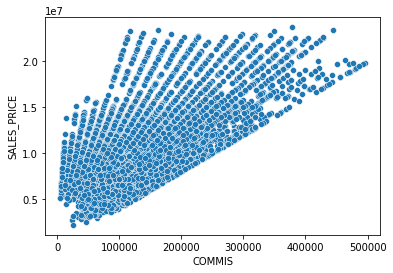

In [28]:
# Scatter Plot

for i in range(len(num_attr)):
    for j in range(i + 1, len(num_attr)):
        a1, a2 = num_attr[i], num_attr[j]
        print(f"Correlation Co-efficient - {a1} vs {a2} : {corr_matrix[a1][a2]}")
        sns.scatterplot(x = a1, y = a2, data = df)
        plt.show()

Correlation Co-efficient - REG_FEE vs SALES_PRICE : 0.8782740699162725


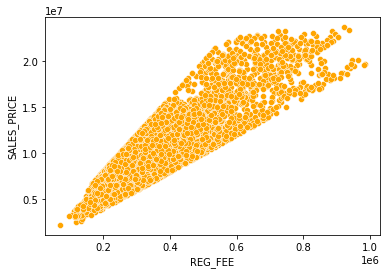

In [29]:
# Variable having a high correlation with the target (REG_FEE)

print(f"Correlation Co-efficient - REG_FEE vs {target} : {corr_matrix['REG_FEE'][target]}")
sns.scatterplot(x = 'REG_FEE', y = target, data = df, color = 'orange')
plt.show()

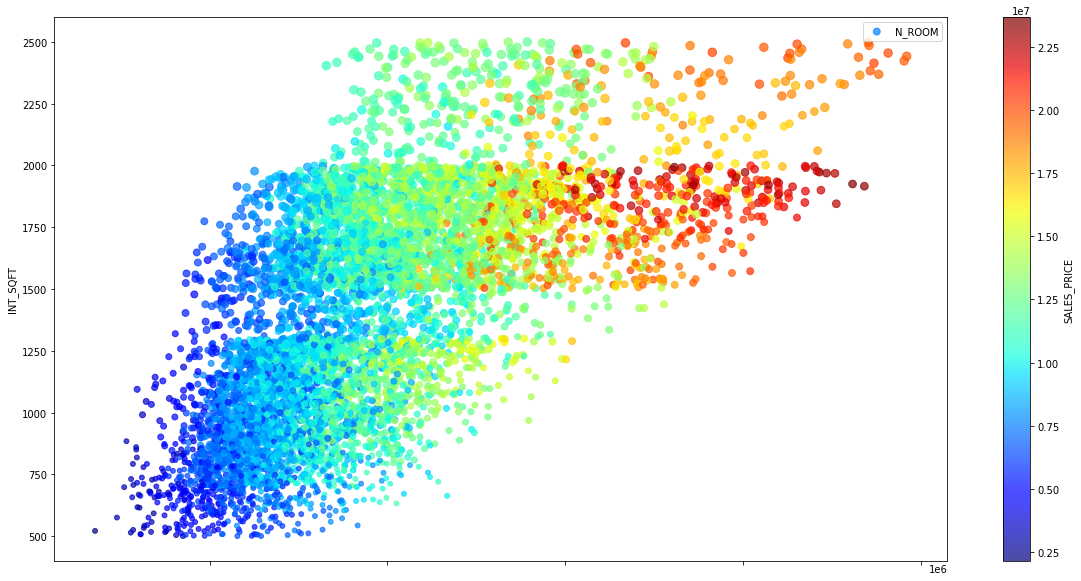

In [30]:
df.plot(kind = 'scatter', x = 'REG_FEE', y = 'INT_SQFT', c = target, s = df['N_ROOM'] * 12, colorbar = True, cmap = 'jet', figsize = (20, 10), alpha = 0.7, label = 'N_ROOM')
plt.show()

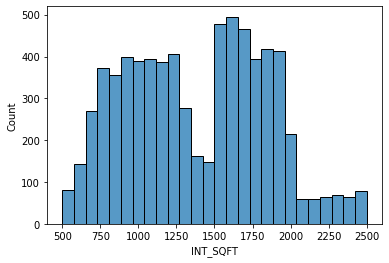

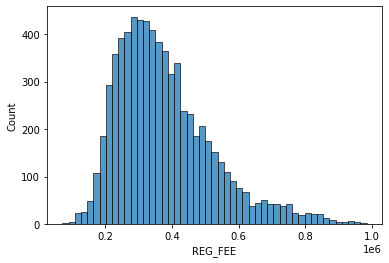

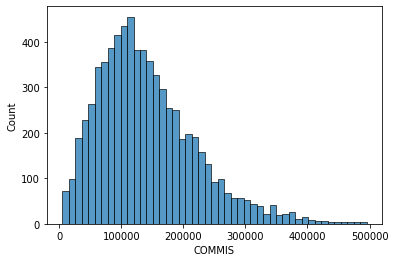

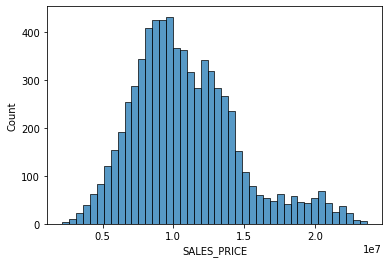

In [31]:
# Histogram

for attr in num_attr:
    sns.histplot(x = attr, data = df)
    plt.show()

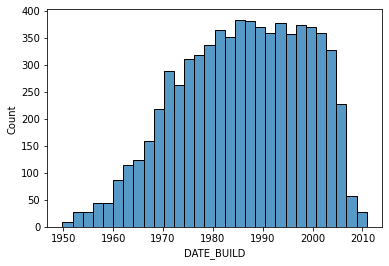

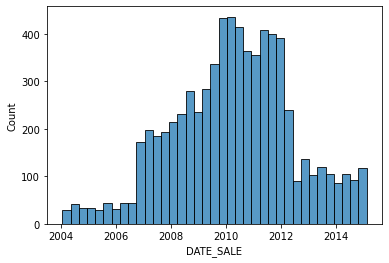

In [32]:
sns.histplot(x = 'DATE_BUILD', data = df)
plt.show()

sns.histplot(x = 'DATE_SALE', data = df)
plt.show()

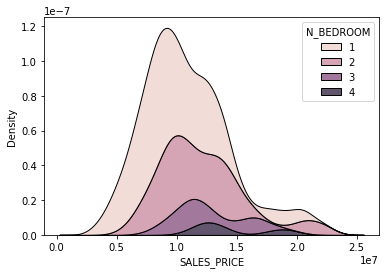

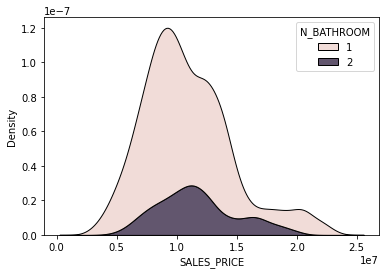

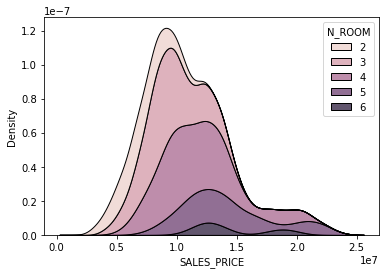

In [33]:
# Kernel Density Plot

for attr in cat_attr[7:10]:
    sns.kdeplot(x = target, hue = attr, data = df, multiple = 'stack')
    plt.show()

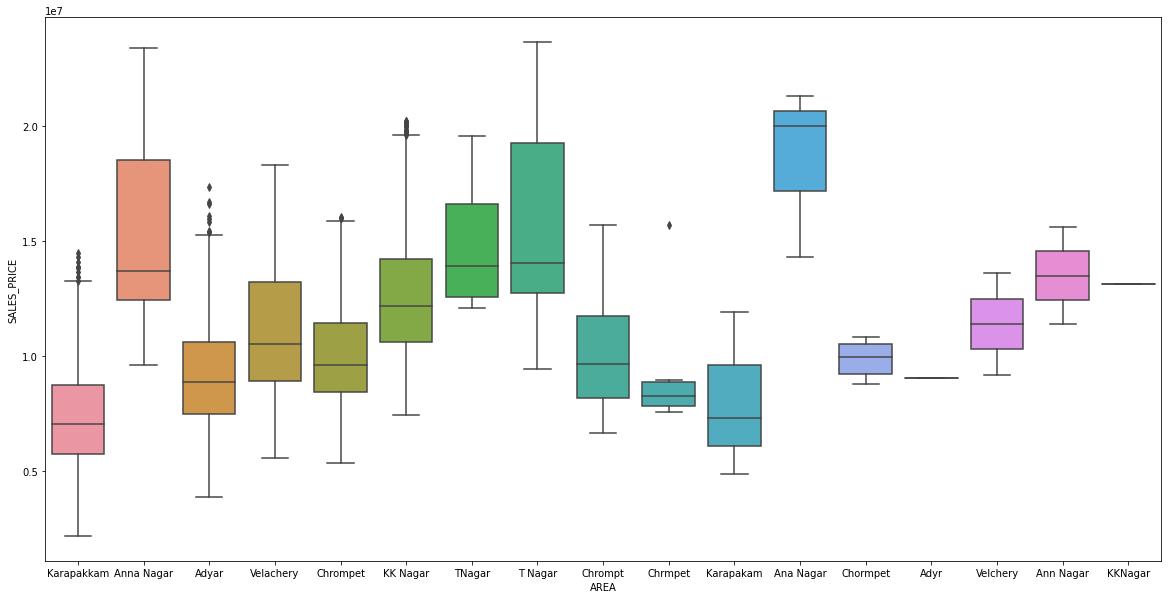

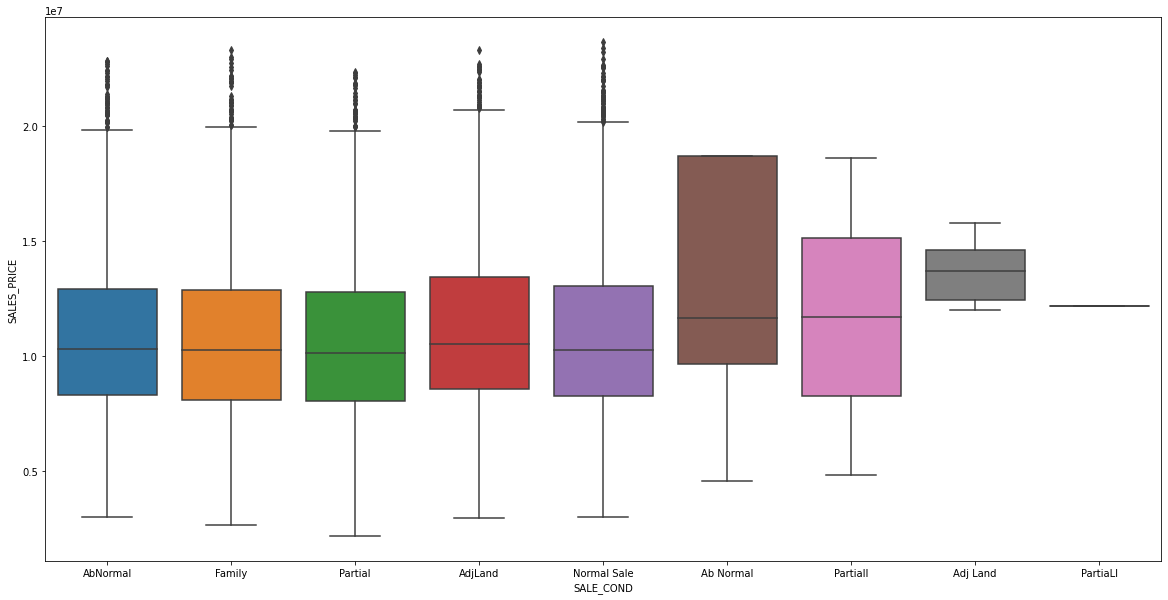

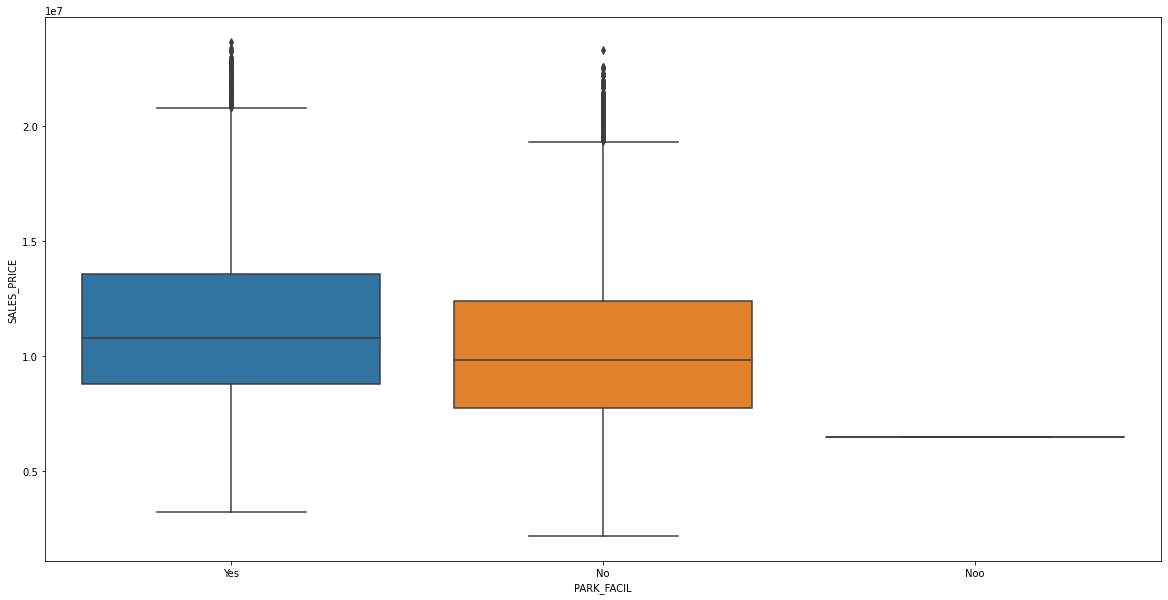

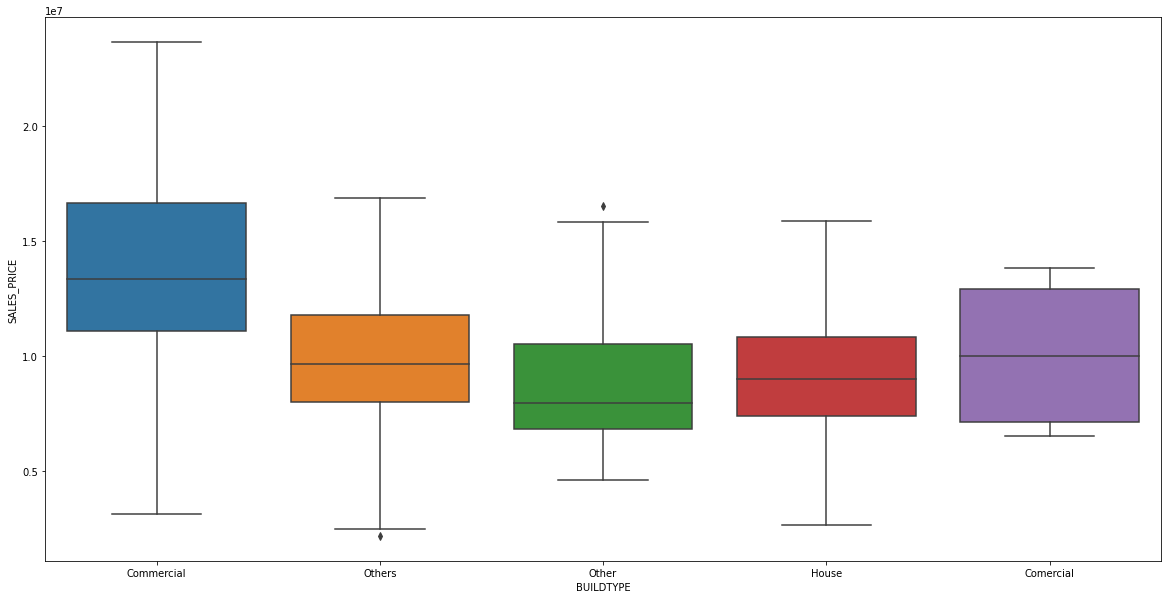

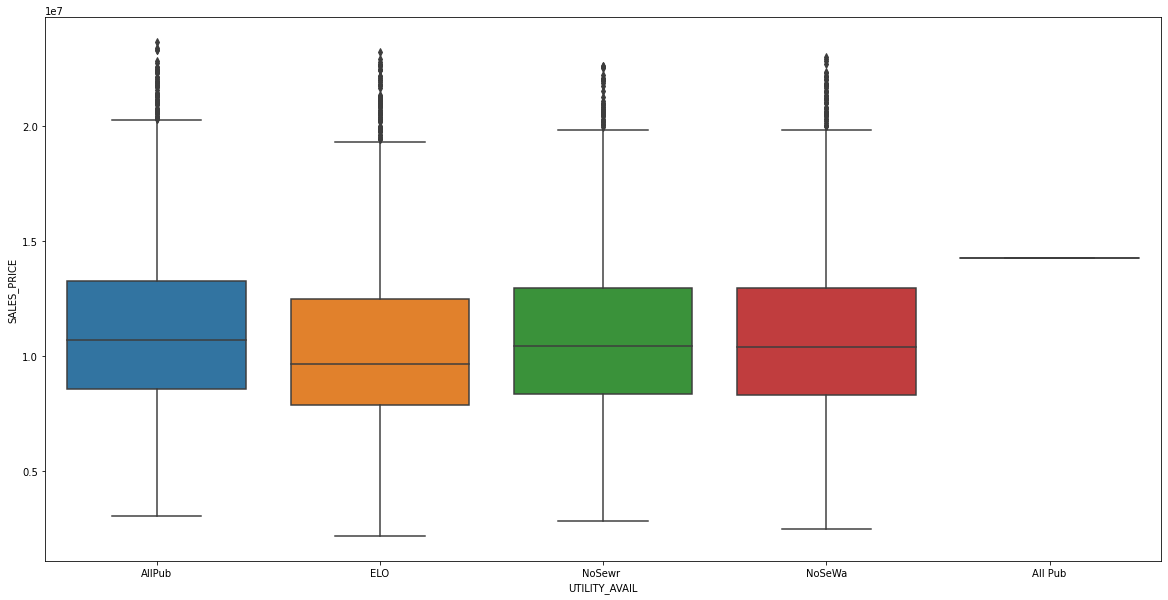

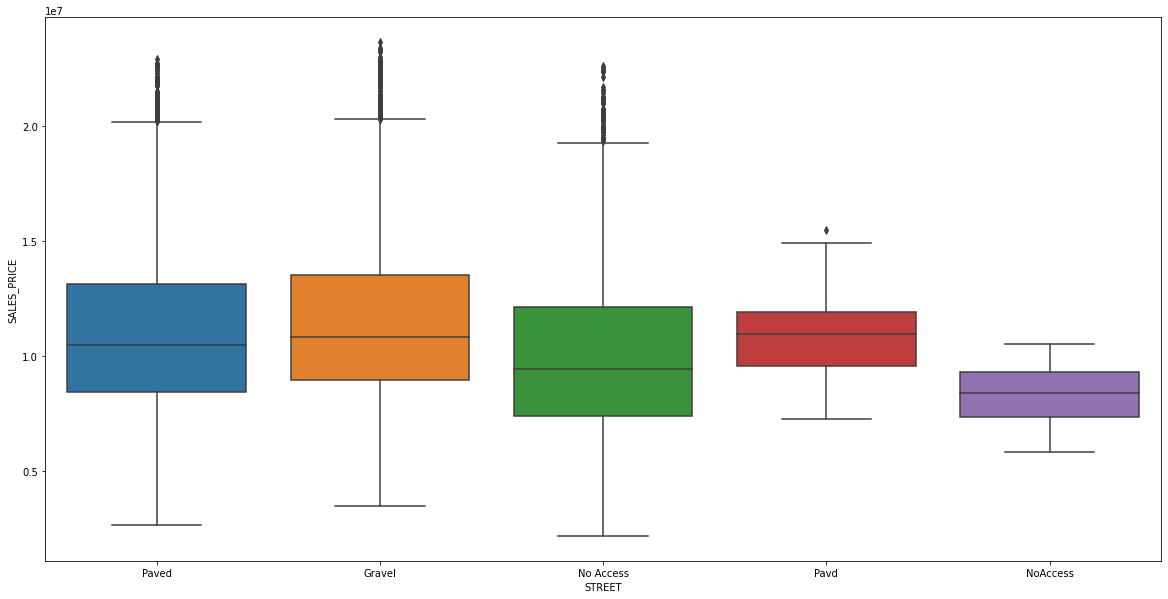

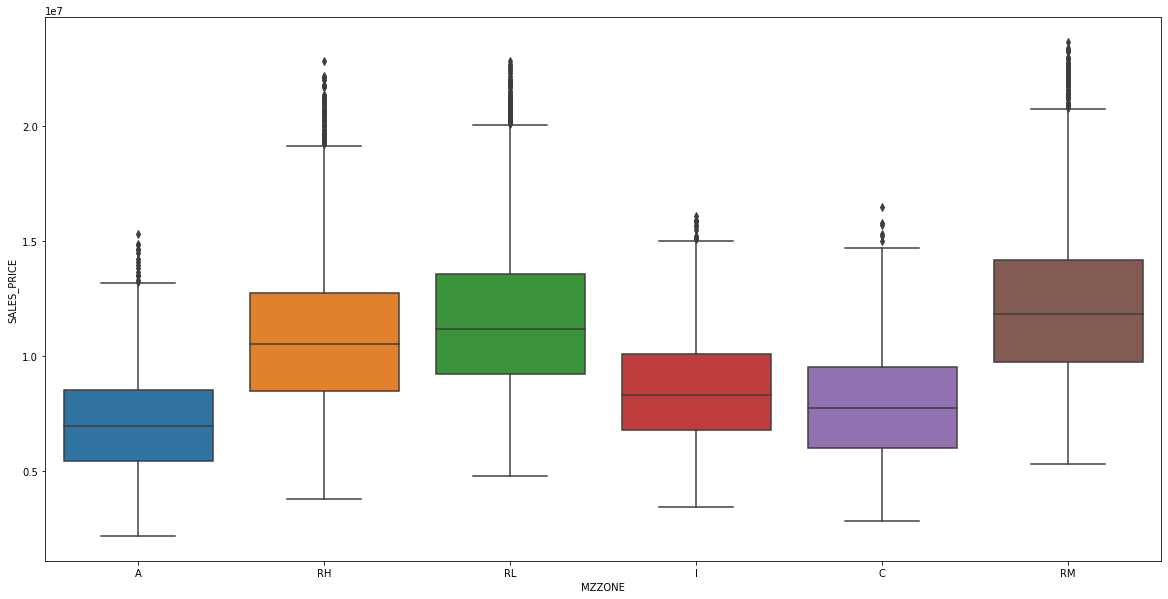

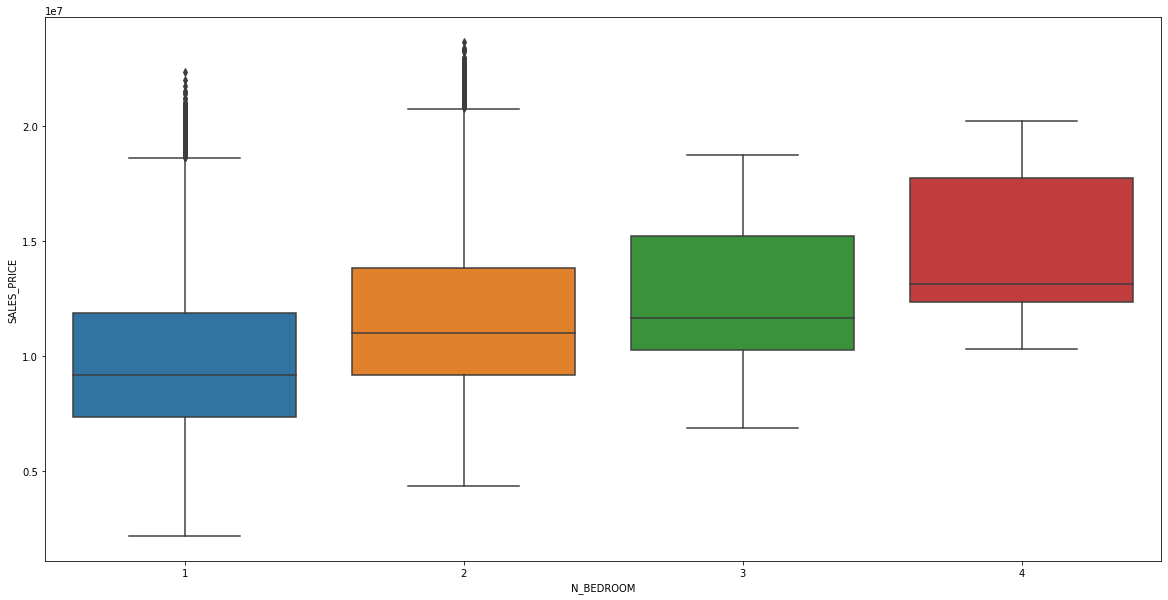

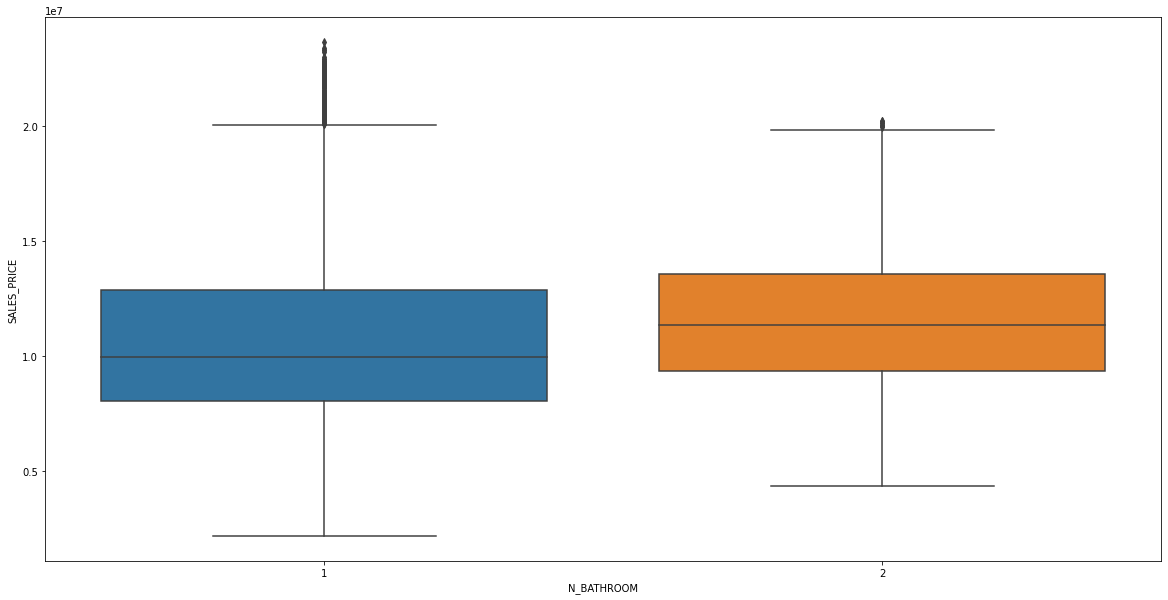

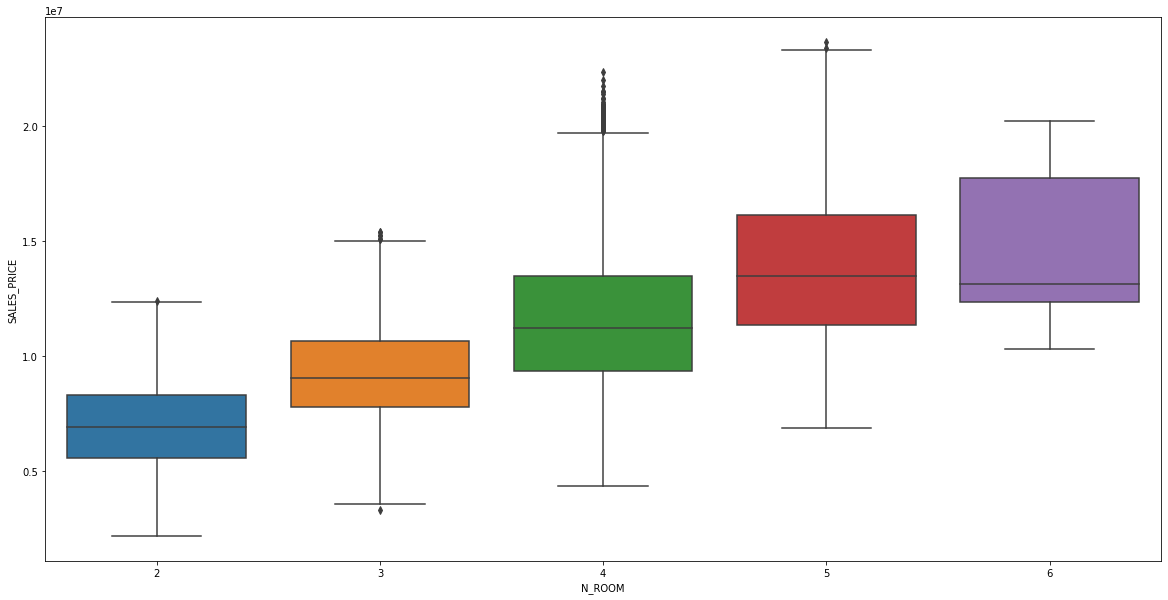

In [34]:
# Box Plot (reveals skewness)


for attr in cat_attr:
    plt.figure(figsize = (20, 10))
    sns.boxplot(x = attr, y = target, data = df)
    plt.show()

AREA : 



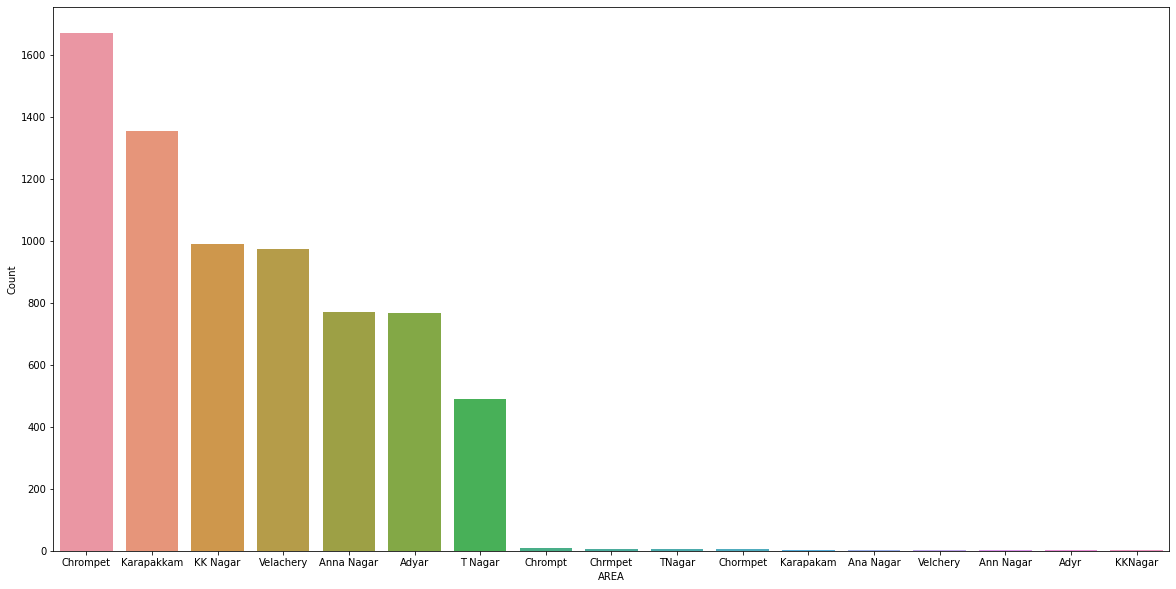

SALE_COND : 



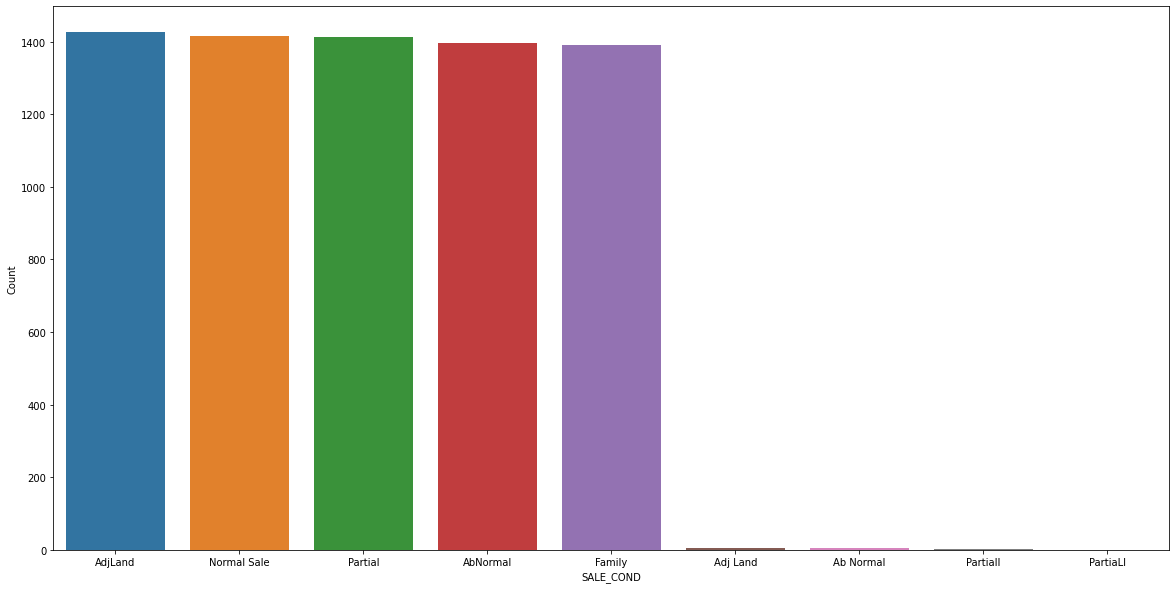

PARK_FACIL : 



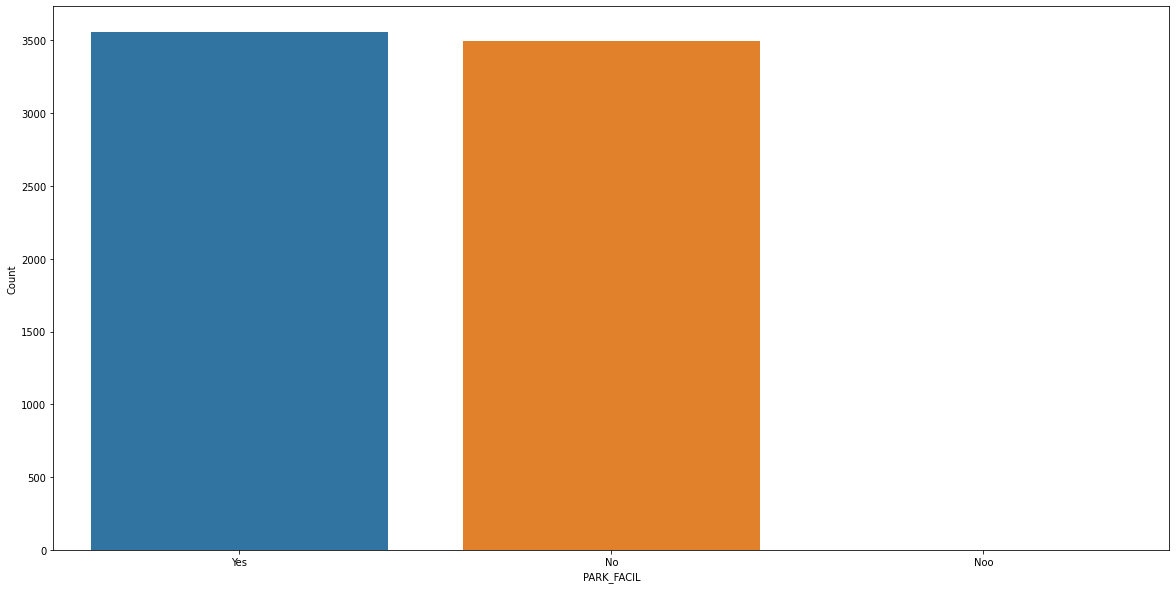

BUILDTYPE : 



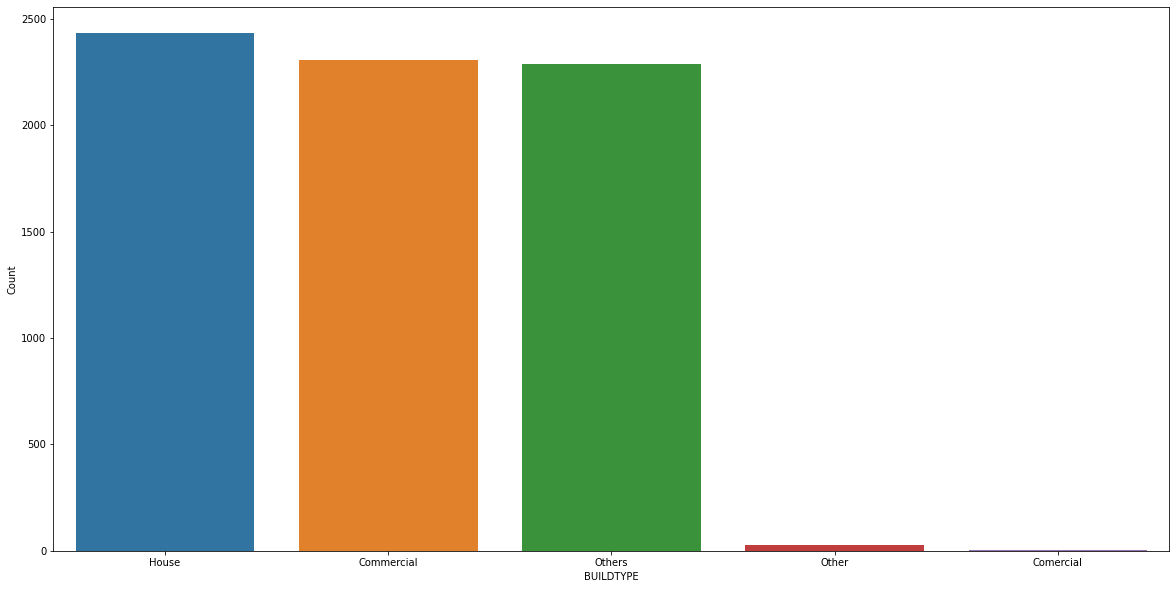

UTILITY_AVAIL : 



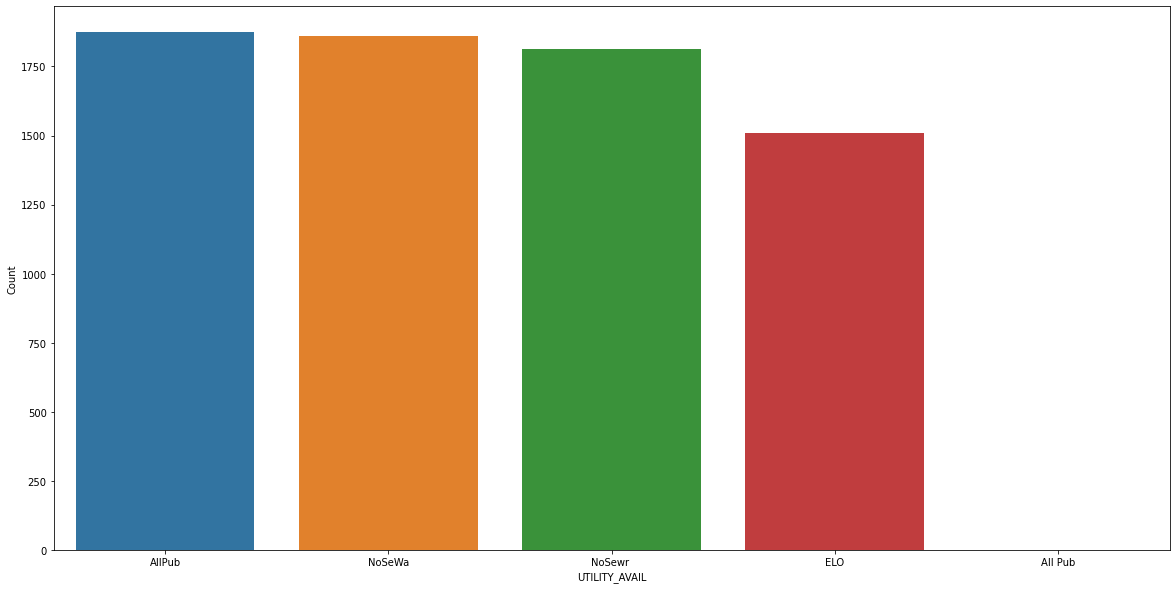

STREET : 



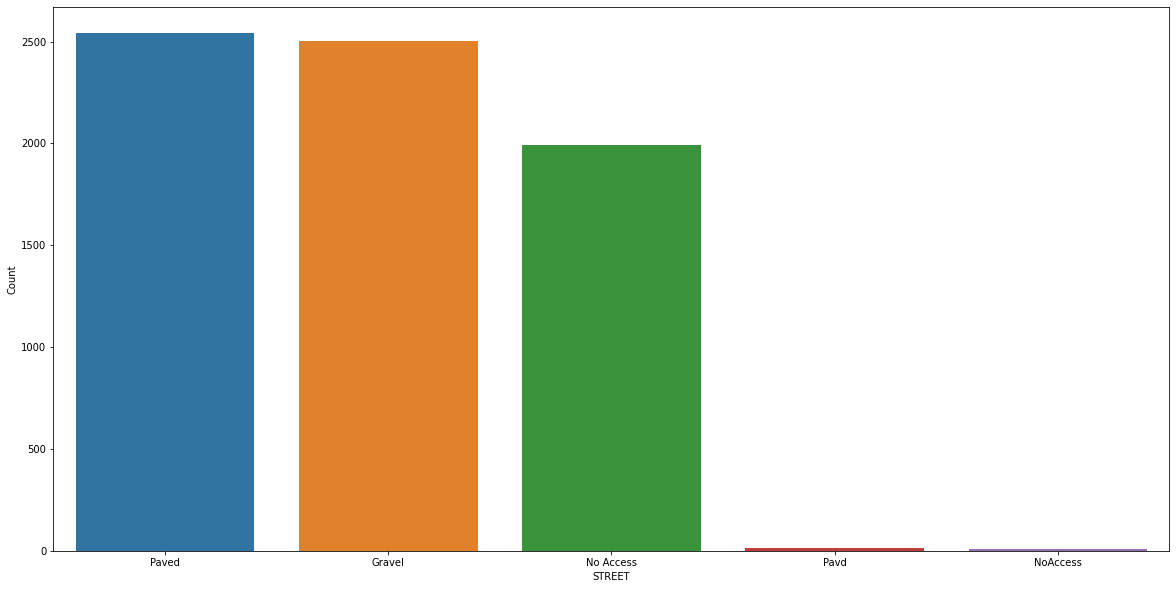

MZZONE : 



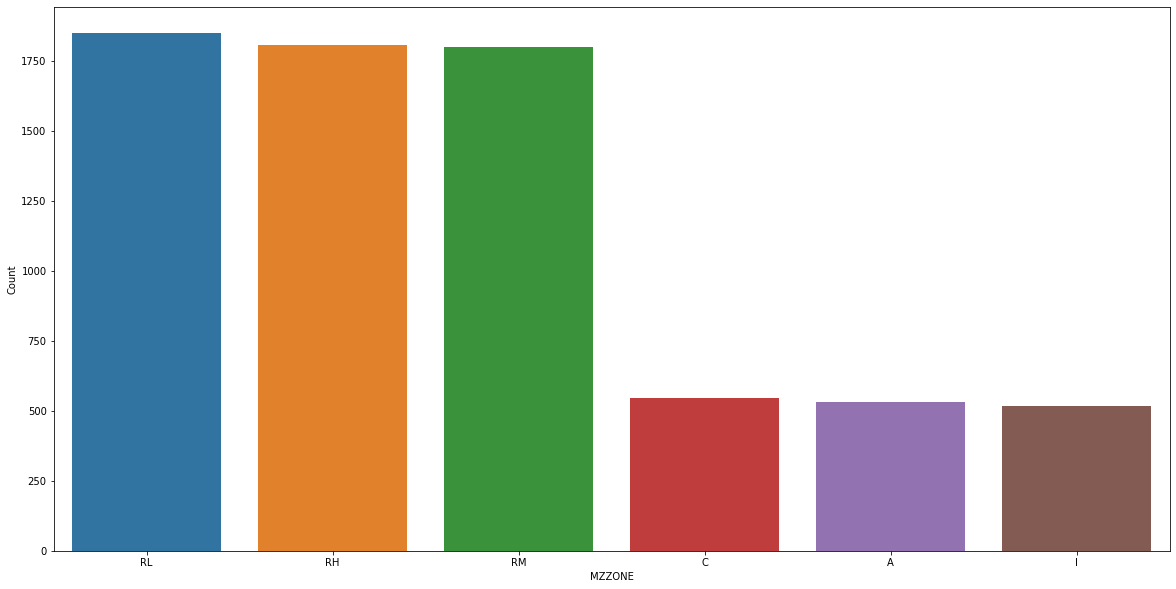

N_BEDROOM : 



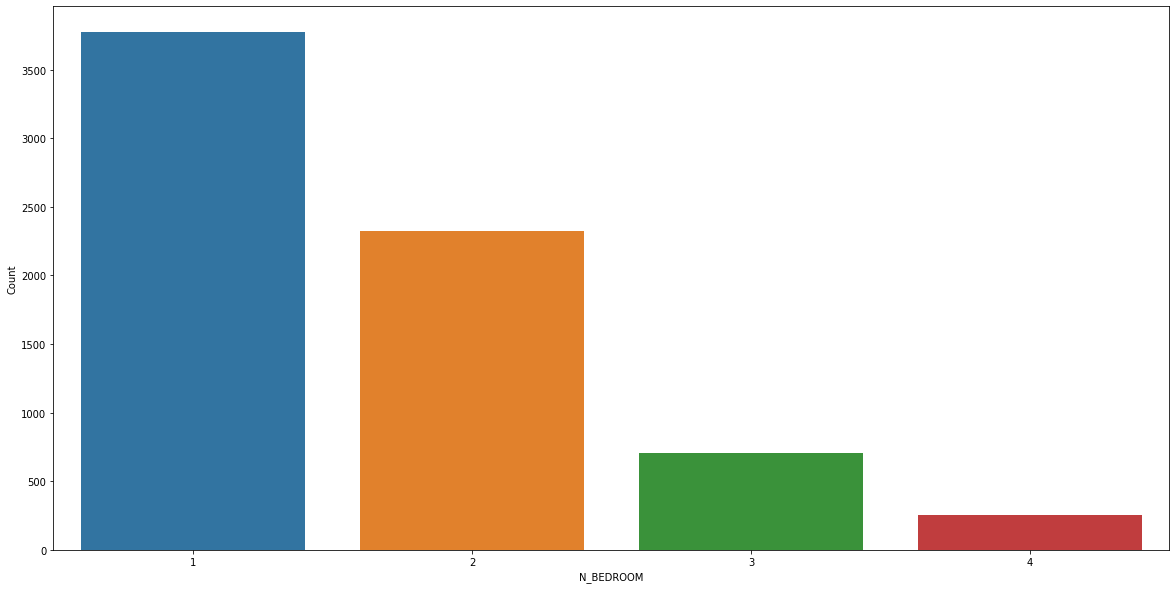

N_BATHROOM : 



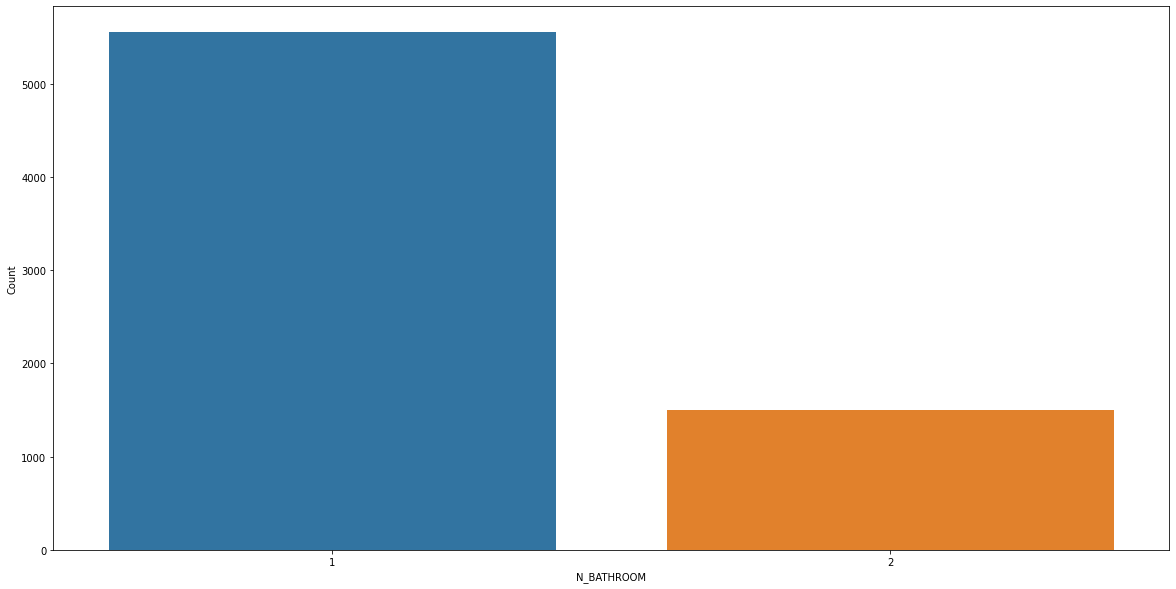

N_ROOM : 



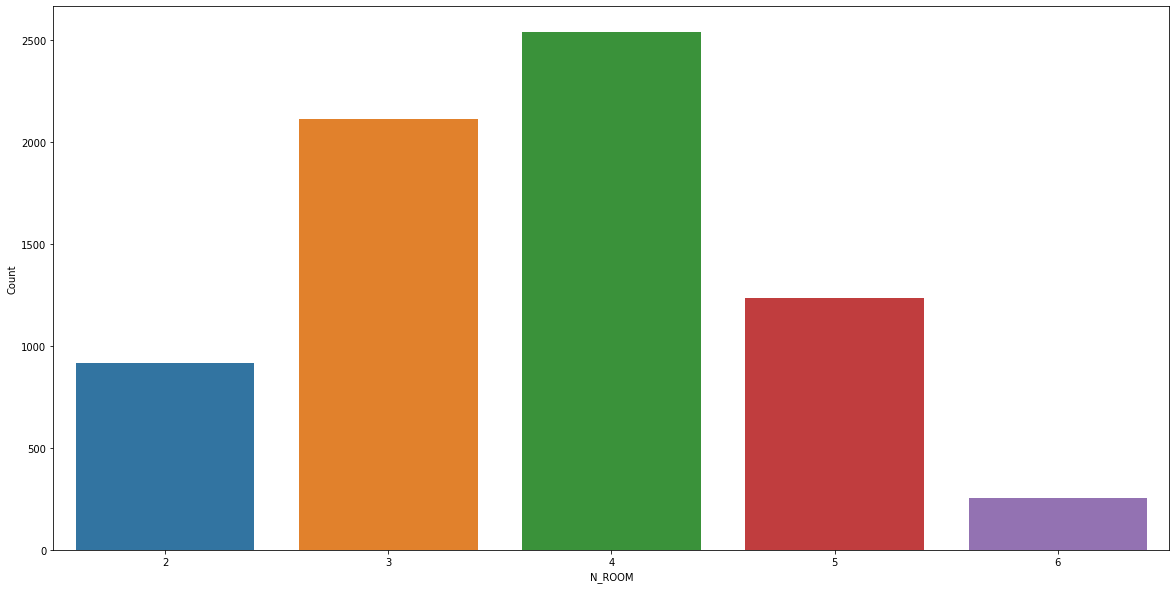

In [35]:
# Bar Chart (visualizing count of unique values in each column)

for attr in cat_attr:
    print(attr + " : \n")
    counts = df[attr].value_counts()
    x_ = counts.keys()
    y_ = counts.values
    plt.figure(figsize = (20, 10))
    plt.xlabel(attr)
    plt.ylabel("Count")
    sns.barplot(x = x_, y = y_, data = df)
    plt.show()

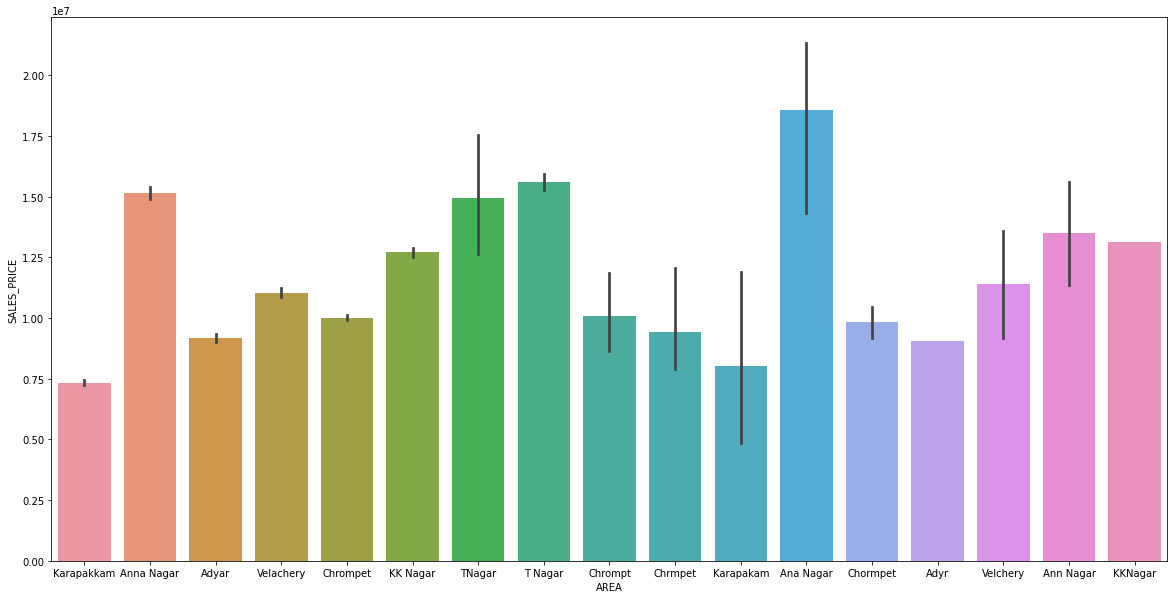

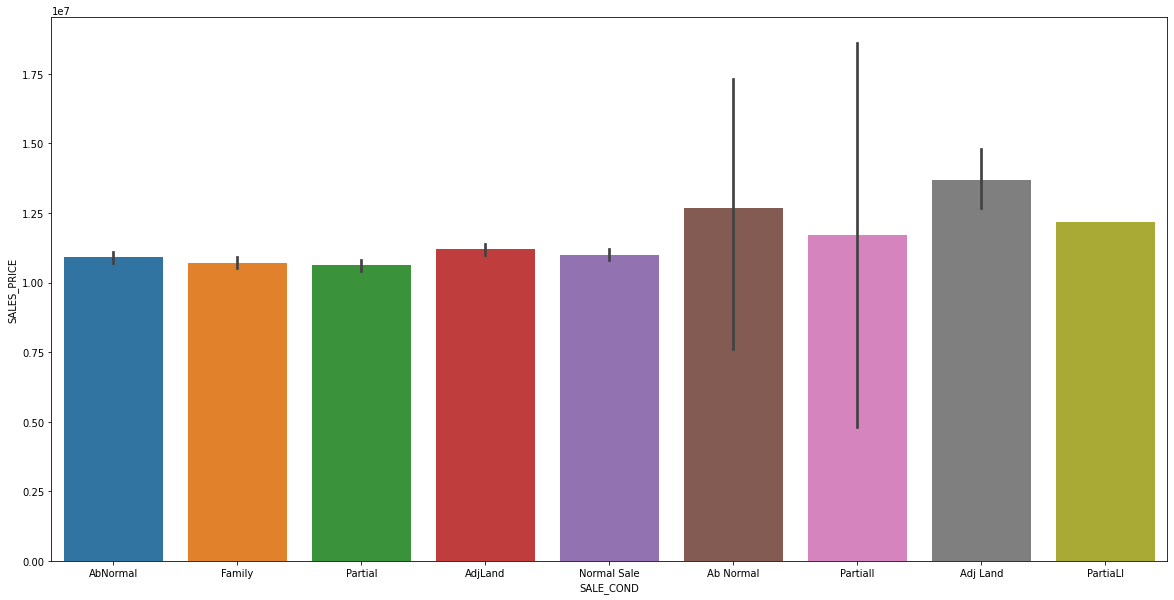

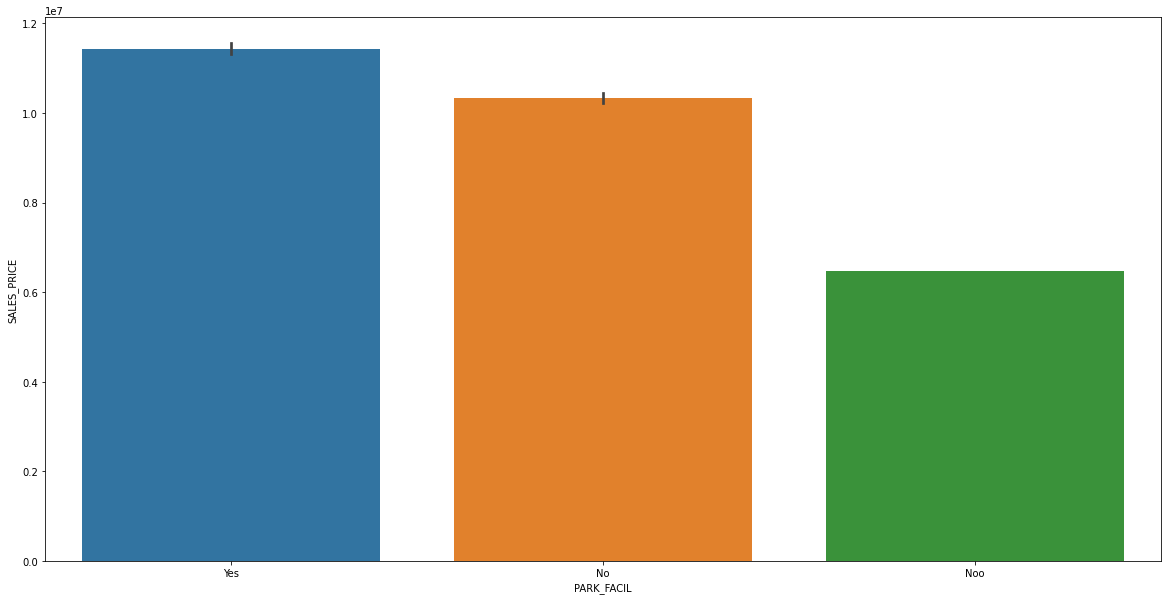

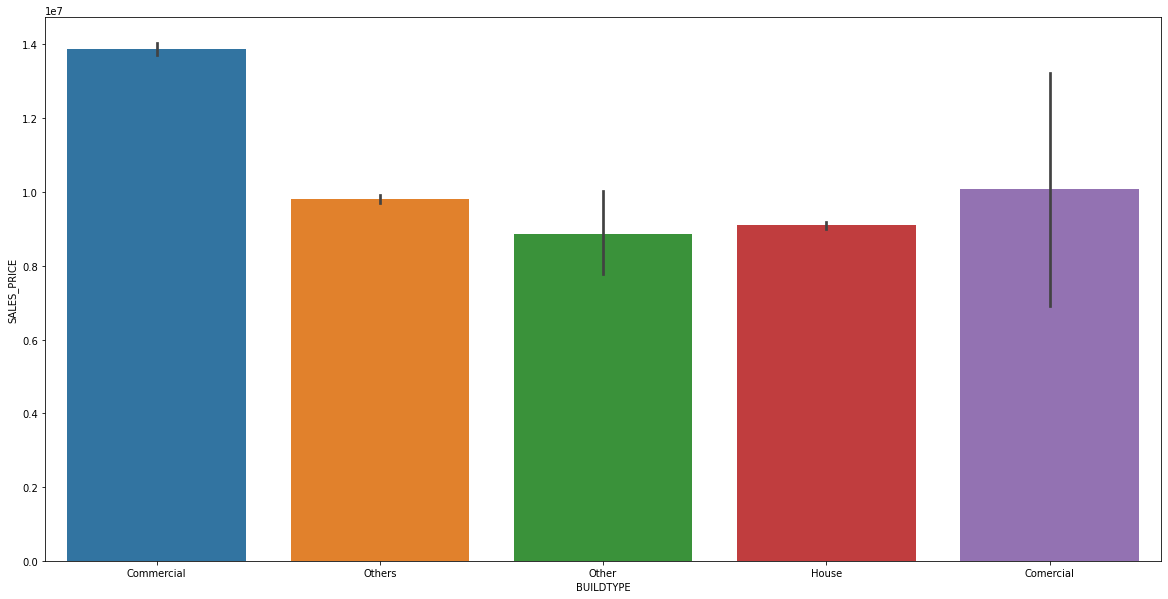

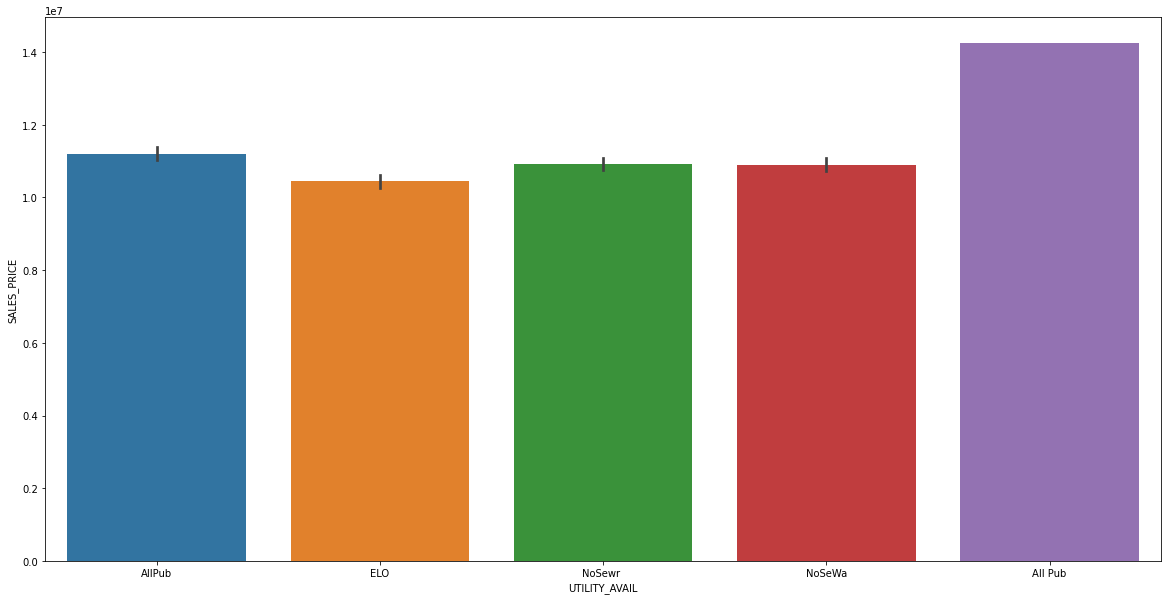

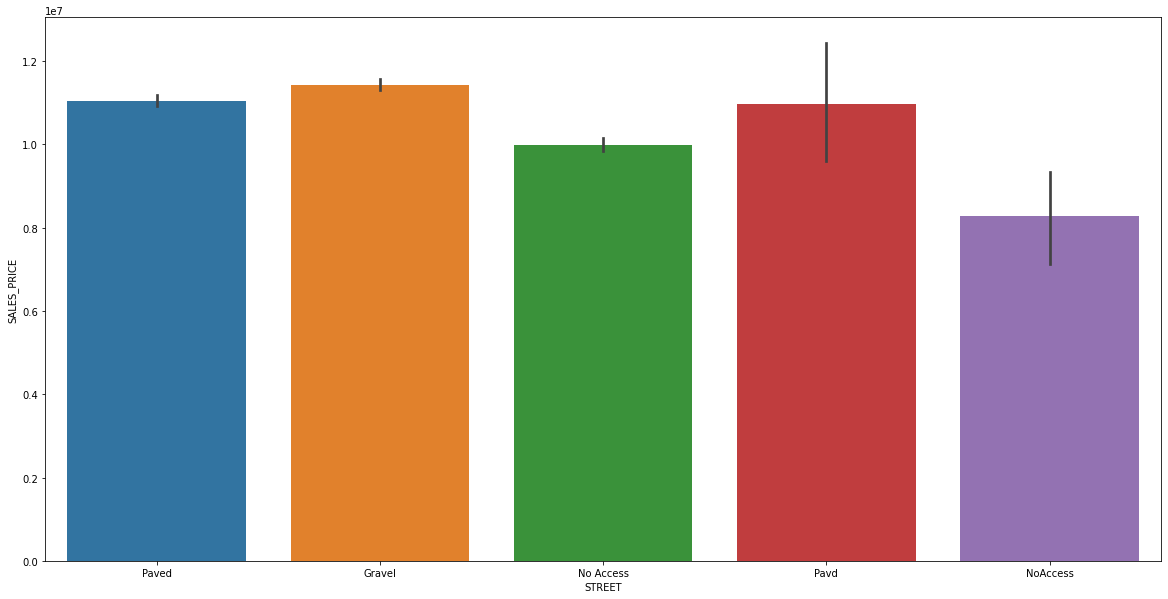

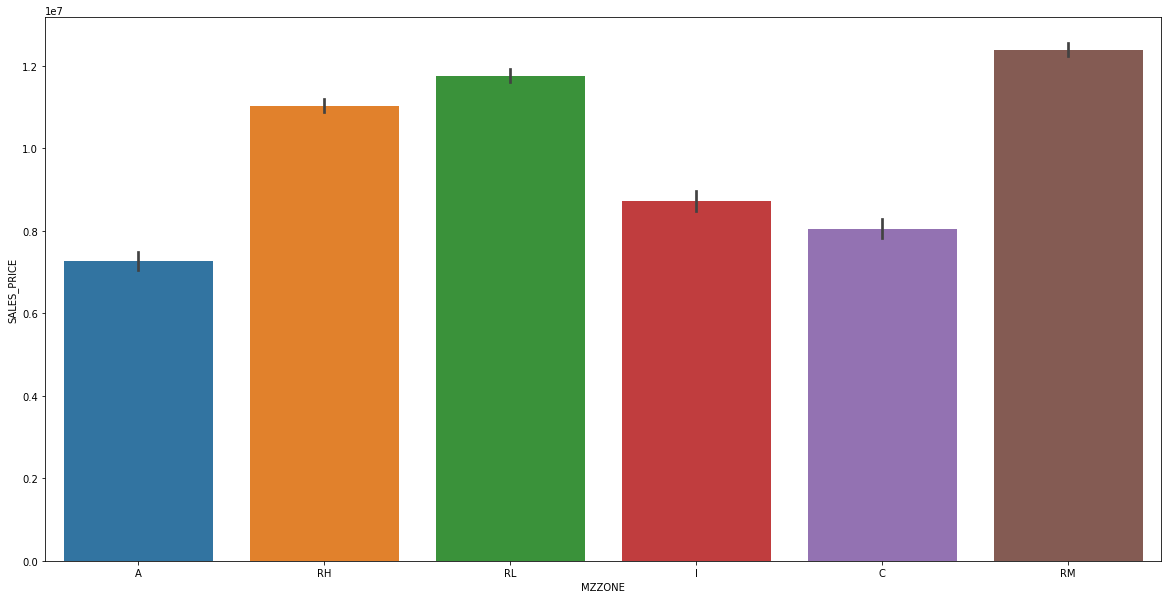

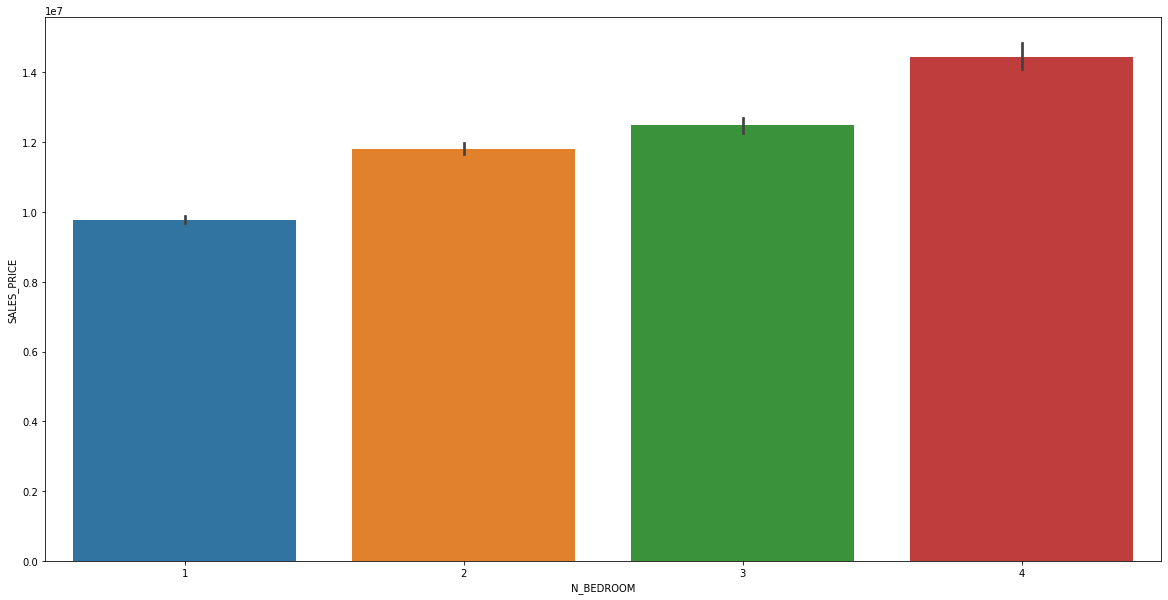

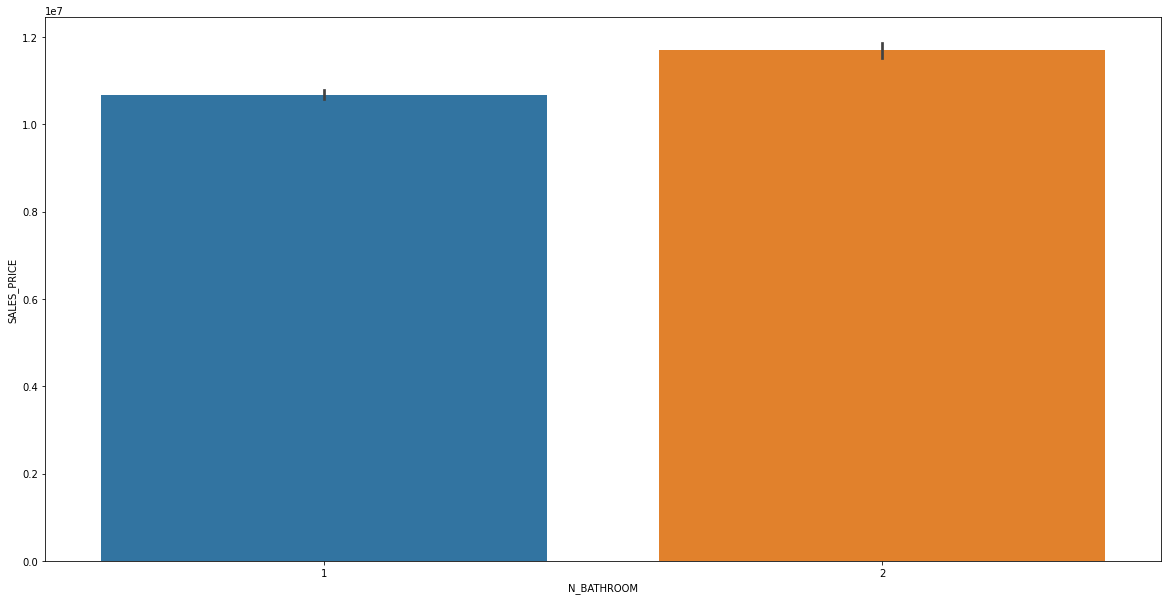

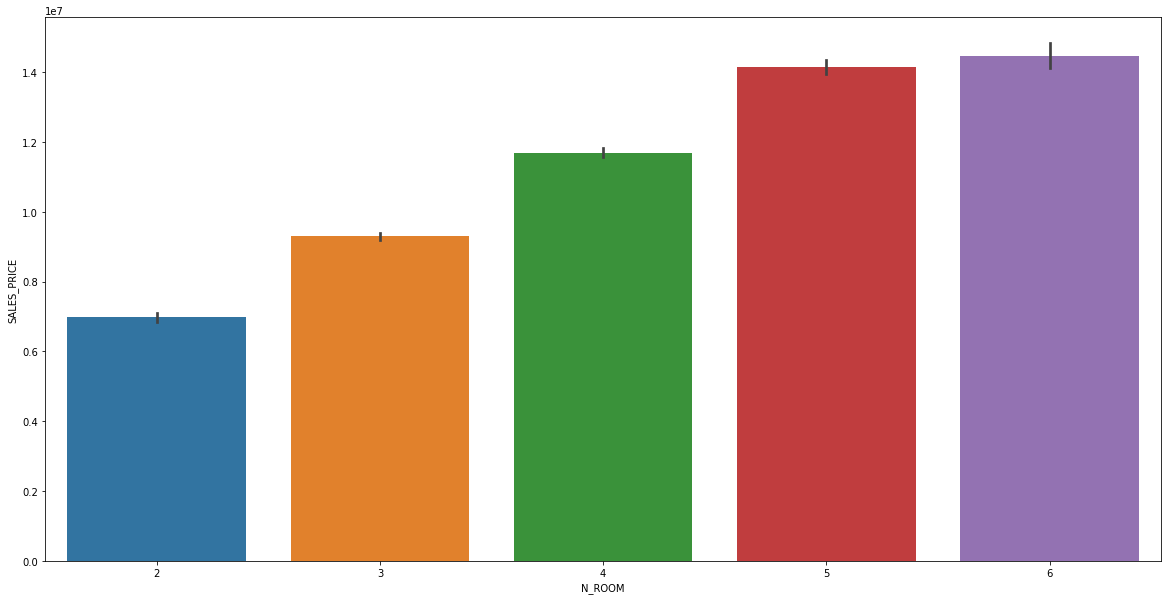

In [36]:
for attr in cat_attr:
    plt.figure(figsize = (20, 10))
    sns.barplot(x = attr, y = target, data = df)
    plt.show()

In [37]:
for attr in cat_attr[7:10]:
    print(f"Mean {target} for {attr}: \n")
    print(df.groupby(attr)[target].mean(), "\n\n")

Mean SALES_PRICE for N_BEDROOM: 

N_BEDROOM
1    9.779932e+06
2    1.181445e+07
3    1.248594e+07
4    1.445166e+07
Name: SALES_PRICE, dtype: float64 


Mean SALES_PRICE for N_BATHROOM: 

N_BATHROOM
1    1.067031e+07
2    1.169165e+07
Name: SALES_PRICE, dtype: float64 


Mean SALES_PRICE for N_ROOM: 

N_ROOM
2    6.982918e+06
3    9.291724e+06
4    1.169312e+07
5    1.414377e+07
6    1.445166e+07
Name: SALES_PRICE, dtype: float64 




Mean SALES_PRICE for N_BEDROOM: 



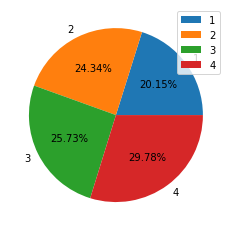

Mean SALES_PRICE for N_BATHROOM: 



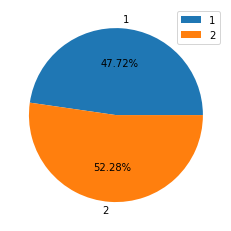

Mean SALES_PRICE for N_ROOM: 



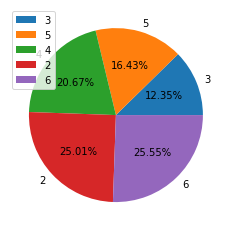

In [38]:
# Pie Chart

for attr in cat_attr[7:10]:
    print(f"Mean {target} for {attr}: \n")
    plt.pie(x = df.groupby(attr)[target].mean(), autopct = "%.2f%%", labels = df[attr].unique())
    plt.legend()
    plt.show()

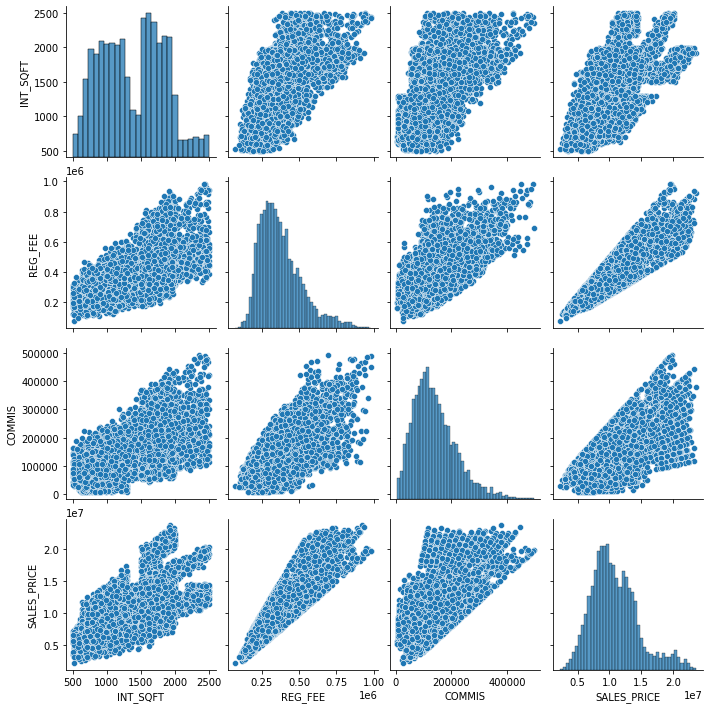

In [39]:
sns.pairplot(df.loc[:, num_attr])
plt.show()

### Data Preprocessing and Preparation


#### Encoding Categorical Data : One Hot Encoding


In [40]:
# Handling Categorical Data that is Not Numeric (One Hot Encoding)

print("Categorical Attributes (Non-Numeric) :", cat_only_attr, '\n\n')

for attr in cat_only_attr:
    print(attr + " :", df[attr].unique(), '\n')

Categorical Attributes (Non-Numeric) : ['AREA', 'SALE_COND', 'PARK_FACIL', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE'] 


AREA : ['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'TNagar' 'T Nagar' 'Chrompt' 'Chrmpet' 'Karapakam' 'Ana Nagar' 'Chormpet'
 'Adyr' 'Velchery' 'Ann Nagar' 'KKNagar'] 

SALE_COND : ['AbNormal' 'Family' 'Partial' 'AdjLand' 'Normal Sale' 'Ab Normal'
 'Partiall' 'Adj Land' 'PartiaLl'] 

PARK_FACIL : ['Yes' 'No' 'Noo'] 

BUILDTYPE : ['Commercial' 'Others' 'Other' 'House' 'Comercial'] 

UTILITY_AVAIL : ['AllPub' 'ELO' 'NoSewr ' 'NoSeWa' 'All Pub'] 

STREET : ['Paved' 'Gravel' 'No Access' 'Pavd' 'NoAccess'] 

MZZONE : ['A' 'RH' 'RL' 'I' 'C' 'RM'] 



In [41]:
# Creating dummy variables for each categorical and non-numeric attribute (One Hot Encoding)

df = original_df.copy()

df.drop(['DATE_SALE', 'DATE_BUILD'], axis = 1, inplace = True)

for attr in cat_only_attr:
    dummy = pd.get_dummies(df[attr]).iloc[:, :-1]
    df = pd.concat([df, dummy], axis = 1)
    df.drop(attr, inplace = True, axis = 1)
    
df.head()

,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,REG_FEE,COMMIS,SALES_PRICE,Adyar,Adyr,Ana Nagar,...,NoSeWa,Gravel,No Access,NoAccess,Pavd,A,C,I,RH,RL
0,1004,1,1,3,380000,144400,7600000,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1986,2,1,5,760122,304049,21717770,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,909,1,1,3,421094,92114,13159200,1,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1855,3,2,5,356321,77042,9630290,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1226,1,1,3,237000,74063,7406250,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [42]:
print("All Columns :", np.array(df.columns))

All Columns : ['INT_SQFT' 'N_BEDROOM' 'N_BATHROOM' 'N_ROOM' 'REG_FEE' 'COMMIS'
 'SALES_PRICE' 'Adyar' 'Adyr' 'Ana Nagar' 'Ann Nagar' 'Anna Nagar'
 'Chormpet' 'Chrmpet' 'Chrompet' 'Chrompt' 'KK Nagar' 'KKNagar'
 'Karapakam' 'Karapakkam' 'T Nagar' 'TNagar' 'Velachery' 'Ab Normal'
 'AbNormal' 'Adj Land' 'AdjLand' 'Family' 'Normal Sale' 'PartiaLl'
 'Partial' 'No' 'Noo' 'Comercial' 'Commercial' 'House' 'Other' 'All Pub'
 'AllPub' 'ELO' 'NoSeWa' 'Gravel' 'No Access' 'NoAccess' 'Pavd' 'A' 'C'
 'I' 'RH' 'RL']


#### Splitting Data into Training and Testing Sets


In [43]:
X = df.drop(target, axis = 1).values
y = df[target].values

In [44]:
# Stratified Splitting

strat_split = model_selection.StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 3)

for train_idx, test_idx in strat_split.split(df, df[cat_num_attr]):
    X_train = df.drop(target, axis = 1).iloc[train_idx]
    X_test = df.drop(target, axis = 1).iloc[test_idx]
    y_train = df[target].iloc[train_idx]
    y_test = df[target].iloc[test_idx]
    

Training Set


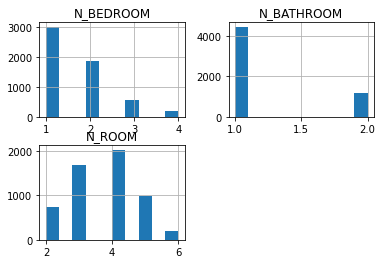

Training Set


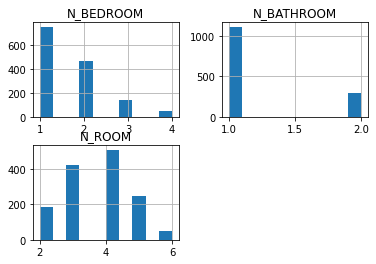

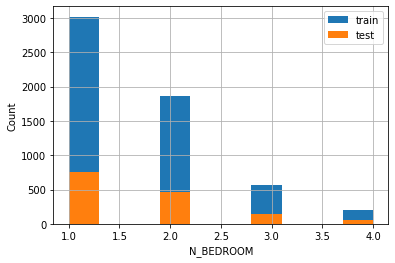

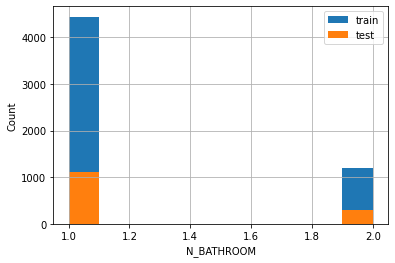

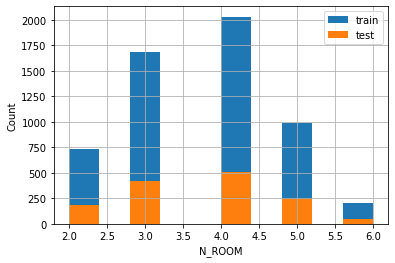

In [45]:
# Checking whether samples are uniformely distributed or not

print("Training Set")
X_train.loc[:, cat_num_attr].hist()
plt.show()

print("Training Set")
X_test.loc[:, cat_num_attr].hist()
plt.show()

for attr in cat_num_attr:
    plt.xlabel(attr)
    plt.ylabel("Count")
    X_train[attr].hist(label = 'train')
    X_test[attr].hist(label = 'test')
    plt.legend()
    plt.show()

In [46]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

#### Scaling the Features


In [47]:
# Creating a data transformation pipeline for feature scaling

p = pipeline.Pipeline([
    ('scaler', preprocessing.StandardScaler())
])

In [48]:
# Scaling the features

X_train_scaled = p.fit_transform(X_train)
y_train_scaled = p.fit_transform(y_train.reshape(-1, 1)).reshape(-1)

X_test_scaled = p.fit_transform(X_test)
y_test_scaled = p.fit_transform(y_test.reshape(-1, 1)).reshape(-1)

In [49]:
print(X_train_scaled.shape, X_test_scaled.shape)

(5644, 49) (1412, 49)


### Training the Linear Regression Model and Evaluating it's Performance


In [50]:
# Implementing Linear Regression from scratch using Batch Gradient Descent

class LinearRegression:
    
    def __init__(self, max_iter = 10000, lr = 0.001):
        self.max_iter = max_iter
        self.lr = lr
        self.coef = self.intercept = None
        
    def fit(self, X, y):
        n, n_features = X.shape
        self.coef = np.zeros(n_features)
        self.intercept = 0
        for i in range(self.max_iter):
            y_pred = np.dot(X, self.coef) + self.intercept
            d_coef = (2 / n) * np.dot(X.T, y_pred - y)
            d_intercept = (2 / n) * np.sum(y_pred - y)
            self.coef -= self.lr * d_coef
            self.intercept -= self.lr * d_intercept
            
    def predict(self, X):
        y_pred = np.dot(X, self.coef) + self.intercept
        return y_pred

In [51]:
# Training the Linear Regression Model

regressor = LinearRegression(max_iter = 10000, lr = 0.1)

regressor.fit(X_train_scaled, y_train_scaled)

In [52]:
print("Co-efficients :", regressor.coef)
print("Intercept :", regressor.intercept)

Co-efficients : [ 3.55022775e-01  3.28854748e-02 -3.67860738e-02  4.86380988e-02
  2.26242935e-01  3.79080525e-02  7.92355155e-02  0.00000000e+00
  2.14034638e-02  4.98529042e-03  1.90996523e-01  6.63192427e-03
  9.98337835e-03  1.05798772e-01  1.10707113e-02 -9.94218202e-02
 -4.66667233e-03 -8.55276920e-03 -1.27686235e-01  1.65400468e-01
  1.50055057e-02 -4.75287767e-02 -6.22875397e-04 -2.39144739e-02
 -3.07811341e-04  3.26055360e-03 -3.58411680e-02 -2.03356403e-02
 -2.79410331e-03 -4.67660175e-02 -1.02768505e-01 -3.22566211e-03
  1.74688728e-02  3.82795025e-01 -6.74575203e-02  2.39942022e-03
 -1.99527203e-03  1.47484283e-02 -1.27731461e-02 -1.12133986e-02
  4.98169584e-02 -5.87574738e-02 -8.73689585e-04 -2.19498995e-04
 -1.61771861e-01 -1.31353099e-01 -9.42300363e-02 -1.12050836e-01
 -5.59939226e-02]
Intercept : -6.823425988341115e-17


In [53]:
# Making predictions on training set and calculating R-Squared Value

y_train_pred = regressor.predict(X_train_scaled)

r2 = metrics.r2_score(y_train_scaled, y_train_pred)
print("R ^ 2 (Co-efficient of Determination) :", r2)

R ^ 2 (Co-efficient of Determination) : 0.9643708489979762


### Model Validation


In [54]:
# Testing the model on testing set

y_test_pred = regressor.predict(X_test_scaled)

r2 = metrics.r2_score(y_test_scaled, y_test_pred)
print("R ^ 2 (Co-efficient of Determination) :", r2)

R ^ 2 (Co-efficient of Determination) : 0.9654341212111691


### Sklearn Implementation


In [55]:
# Training the Linear Regression Model

model = linear_model.LinearRegression()

model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [56]:
print("Co-efficients :", model.coef_)
print("Intercept :", model.intercept_)

Co-efficients : [ 3.55137529e-01  3.30922544e-02 -3.67945764e-02  4.84693396e-02
  2.26213713e-01  3.79227798e-02  1.31003317e-01  4.80171458e-15
  2.52130981e-02  7.18483292e-03  2.42515688e-01  1.10305492e-02
  1.53711227e-02  1.76016413e-01  1.64553727e-02 -4.19997680e-02
 -2.46758041e-03 -4.74485084e-03 -6.28805591e-02  2.07570234e-01
  1.88148685e-02  9.33379906e-03 -1.76480383e-03 -4.10411644e-02
 -1.70947401e-03 -1.39534619e-02 -5.28916213e-02 -3.74924776e-02
 -3.36258094e-03 -6.39443482e-02 -1.02799085e-01 -3.23068403e-03
  1.74690738e-02  3.82796961e-01 -6.74298179e-02  2.40126564e-03
 -1.99778875e-03  1.47480648e-02 -1.27287898e-02 -1.12252689e-02
  4.98684609e-02 -5.87643444e-02 -8.70064746e-04 -2.19485853e-04
 -1.61671873e-01 -1.31329870e-01 -9.42097401e-02 -1.12037216e-01
 -5.59824818e-02]
Intercept : -6.504831750361701e-17


In [57]:
# Making predictions on training set and calculating R-Squared Value

y_train_pred = model.predict(X_train_scaled)

r2 = metrics.r2_score(y_train_scaled, y_train_pred)
print("R ^ 2 (Co-efficient of Determination) :", r2)

R ^ 2 (Co-efficient of Determination) : 0.9643763070328044


In [58]:
# Testing the model on testing set

y_test_pred = model.predict(X_test_scaled)

r2 = metrics.r2_score(y_test_scaled, y_test_pred)
print("R ^ 2 (Co-efficient of Determination) :", r2)

R ^ 2 (Co-efficient of Determination) : 0.9651618037717475


# Conclusion


#### Model : Linear Regression

#### Train Score ( Co-efficient of Determination ) : 0.9643763070328044

#### Test Score ( Co-efficient of Determination ) : 0.9651618037717475
